<a href="https://www.kaggle.com/code/adegbaju/readopt-ai-an-intelligent-reading-performance-opt?scriptVersionId=288746519" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ReadOpt AI: An Intelligent Reading Performance Optimization System Using Agentic AI

**ReadOpt AI *is an advanced, multi-model artificial intelligence system designed to analyze, predict, and optimize reading performance through data-driven insights and personalized recommendations. This comprehensive project leverages a rich dataset of reading sessions encompassing demographic, contextual, and behavioral factors to develop an agentic AI capable of providing intelligent, adaptive guidance for enhancing reading efficiency, focus, and overall learning outcomes*.**

**Core Innovation**

**The system represents a significant advancement in educational technology by integrating three complementary machine learning approaches**:

*Focus Level Classification using Random Forest for predicting concentration levels*

*Pages Read Regression using XGBoost for forecasting reading output*

*Reader Clustering using K-Means for personalized user segmentation*


**Project Keywords**: *Educational AI, Reading Optimization, Agentic Systems, Machine Learning, Data Visualization, Personalized Learning, Performance Analytics, Behavioral Analysis*

**Technology Stack**:* Python, Scikit-learn, XGBoost, Pandas, Matplotlib, Seaborn, Plotly, Joblib*

**Dataset**: *Reading Performance with Demographic and Contextual Factors*

**Outcome**: *Production-ready AI system with comprehensive analytics and visualization capabilities*

# Importing Libraries

In [1]:

!pip install xgboost 
!pip install joblib

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import joblib
import warnings
from matplotlib.gridspec import GridSpec
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

warnings.filterwarnings('ignore')

# LOAD AND EXPLORE DATA

In [3]:

print("Loading dataset...")
df = pd.read_parquet('/kaggle/input/reading-performance/reading.parquet')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Loading dataset...
Dataset shape: (118, 21)
Columns: ['AGE_CATEGORY', 'GENDER', 'MAJOR', 'MINUTES_READING', 'MINUTES_BREAK', 'FOCUS_LEVEL', 'PAGES', 'CONTENT_LEVEL_ENUM', 'READING_GENRE', 'SOUND_VOLUME', 'DEVICE', 'LOCATION', 'WEATHER', 'MOOD', 'HUNGER', 'AROUSAL', 'MENTAL_IN_BREAK', 'COMPREHENSION_DEPTH', 'LINKING_TO_PREVIOUS_KNOWLEDGE', 'MENTAL_FATIGUE', 'INTERESTING_LEVEL']


,AGE_CATEGORY,GENDER,MAJOR,MINUTES_READING,MINUTES_BREAK,FOCUS_LEVEL,PAGES,CONTENT_LEVEL_ENUM,READING_GENRE,SOUND_VOLUME,...,LOCATION,WEATHER,MOOD,HUNGER,AROUSAL,MENTAL_IN_BREAK,COMPREHENSION_DEPTH,LINKING_TO_PREVIOUS_KNOWLEDGE,MENTAL_FATIGUE,INTERESTING_LEVEL
0,young_adult,male,student,80,10,2,8.0,2,technical_&_vocational,silent,...,home,clear,slightly_bad,slightly_hungry,slightly_low,neutral,good,some_connections,slightly_fatigued,neutral
1,young_adult,male,student,80,10,2,8.0,3,technical_&_vocational,silent,...,home,clear,slightly_bad,slightly_hungry,slightly_low,neutral,basic,some_connections,fresh,somewhat_interesting
2,young_adult,male,student,80,20,1,14.0,2,technical_&_vocational,silent,...,home,cloudy,slightly_bad,full,neutral,chaotic,basic,forced_linking,slightly_fatigued,neutral
3,young_adult,male,student,48,4,3,3.0,3,technical_&_vocational,silent,...,home,clear,neutral,full,high,chaotic,basic,forced_linking,normal,boring
4,young_adult,male,student,95,22,3,7.0,3,technical_&_vocational,silent,...,home,clear,neutral,satisfied,slightly_high,very_chaotic,basic,forced_linking,slightly_fatigued,extremely_boring


In [4]:
df.describe(include='all')

,AGE_CATEGORY,GENDER,MAJOR,MINUTES_READING,MINUTES_BREAK,FOCUS_LEVEL,PAGES,CONTENT_LEVEL_ENUM,READING_GENRE,SOUND_VOLUME,...,LOCATION,WEATHER,MOOD,HUNGER,AROUSAL,MENTAL_IN_BREAK,COMPREHENSION_DEPTH,LINKING_TO_PREVIOUS_KNOWLEDGE,MENTAL_FATIGUE,INTERESTING_LEVEL
count,118,118,118,118.000000,118.000000,118.000000,118.000000,118.000000,118,118,...,118,118,118,118,118,118,118,118,118,118
unique,1,1,1,NaN,NaN,NaN,NaN,NaN,4,8,...,4,5,6,10,6,8,7,5,7,7
top,young_adult,male,student,NaN,NaN,NaN,NaN,NaN,academic,silent,...,home,clear,good,satisfied,high,none_break,good,some_connections,normal,interesting
freq,118,118,118,NaN,NaN,NaN,NaN,NaN,82,58,...,101,43,44,33,60,42,36,56,39,32
mean,NaN,NaN,NaN,77.779661,10.466102,2.644068,10.741525,2.271186,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,50.450303,19.374264,0.620524,10.065328,0.833703,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,12.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,48.500000,0.000000,2.000000,4.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.500000,4.500000,3.000000,8.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,95.000000,15.000000,3.000000,14.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display basic info
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AGE_CATEGORY                   118 non-null    object 
 1   GENDER                         118 non-null    object 
 2   MAJOR                          118 non-null    object 
 3   MINUTES_READING                118 non-null    int64  
 4   MINUTES_BREAK                  118 non-null    int64  
 5   FOCUS_LEVEL                    118 non-null    int64  
 6   PAGES                          118 non-null    float64
 7   CONTENT_LEVEL_ENUM             118 non-null    int64  
 8   READING_GENRE                  118 non-null    object 
 9   SOUND_VOLUME                   118 non-null    object 
 10  DEVICE                         118 non-null    object 
 11  LOCATION                       118 non-null    object 
 12  WEATHER                        118 

In [6]:
# Check data types and unique values
print("\nChecking data types:")
print(df.dtypes)
print("\nChecking unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].dtype == 'object':
        print(f"  Sample values: {df[col].unique()[:5]}")



Checking data types:
AGE_CATEGORY                      object
GENDER                            object
MAJOR                             object
MINUTES_READING                    int64
MINUTES_BREAK                      int64
FOCUS_LEVEL                        int64
PAGES                            float64
CONTENT_LEVEL_ENUM                 int64
READING_GENRE                     object
SOUND_VOLUME                      object
DEVICE                            object
LOCATION                          object
WEATHER                           object
MOOD                              object
HUNGER                            object
AROUSAL                           object
MENTAL_IN_BREAK                   object
COMPREHENSION_DEPTH               object
LINKING_TO_PREVIOUS_KNOWLEDGE     object
MENTAL_FATIGUE                    object
INTERESTING_LEVEL                 object
dtype: object

Checking unique values in each column:
AGE_CATEGORY: 1 unique values
  Sample values: ['young_adult']


# DATA PREPROCESSING

In [7]:

print("\nPreprocessing data...")

# Create a copy to avoid modifying original
df_processed = df.copy()

# Handle missing values if any
print(f"Missing values before cleaning: {df_processed.isnull().sum().sum()}")
df_processed = df_processed.dropna()
print(f"Missing values after cleaning: {df_processed.isnull().sum().sum()}")

# Identify categorical and numerical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Create derived features (after handling categoricals)
df_processed['READING_EFFICIENCY'] = df_processed['PAGES'] / (df_processed['MINUTES_READING'] + 1)
df_processed['BREAK_RATIO'] = df_processed['MINUTES_BREAK'] / (df_processed['MINUTES_READING'] + df_processed['MINUTES_BREAK'] + 1)

# Update numerical columns after creating new features
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()


Preprocessing data...
Missing values before cleaning: 0
Missing values after cleaning: 0

Categorical columns: ['AGE_CATEGORY', 'GENDER', 'MAJOR', 'READING_GENRE', 'SOUND_VOLUME', 'DEVICE', 'LOCATION', 'WEATHER', 'MOOD', 'HUNGER', 'AROUSAL', 'MENTAL_IN_BREAK', 'COMPREHENSION_DEPTH', 'LINKING_TO_PREVIOUS_KNOWLEDGE', 'MENTAL_FATIGUE', 'INTERESTING_LEVEL']
Numerical columns: ['MINUTES_READING', 'MINUTES_BREAK', 'FOCUS_LEVEL', 'PAGES', 'CONTENT_LEVEL_ENUM']


# READING PERFORMANCE DATA VISUALIZATION SUITE

Required packages:
pip install pandas numpy matplotlib seaborn plotly
READING PERFORMANCE DATA VISUALIZATION SUITE


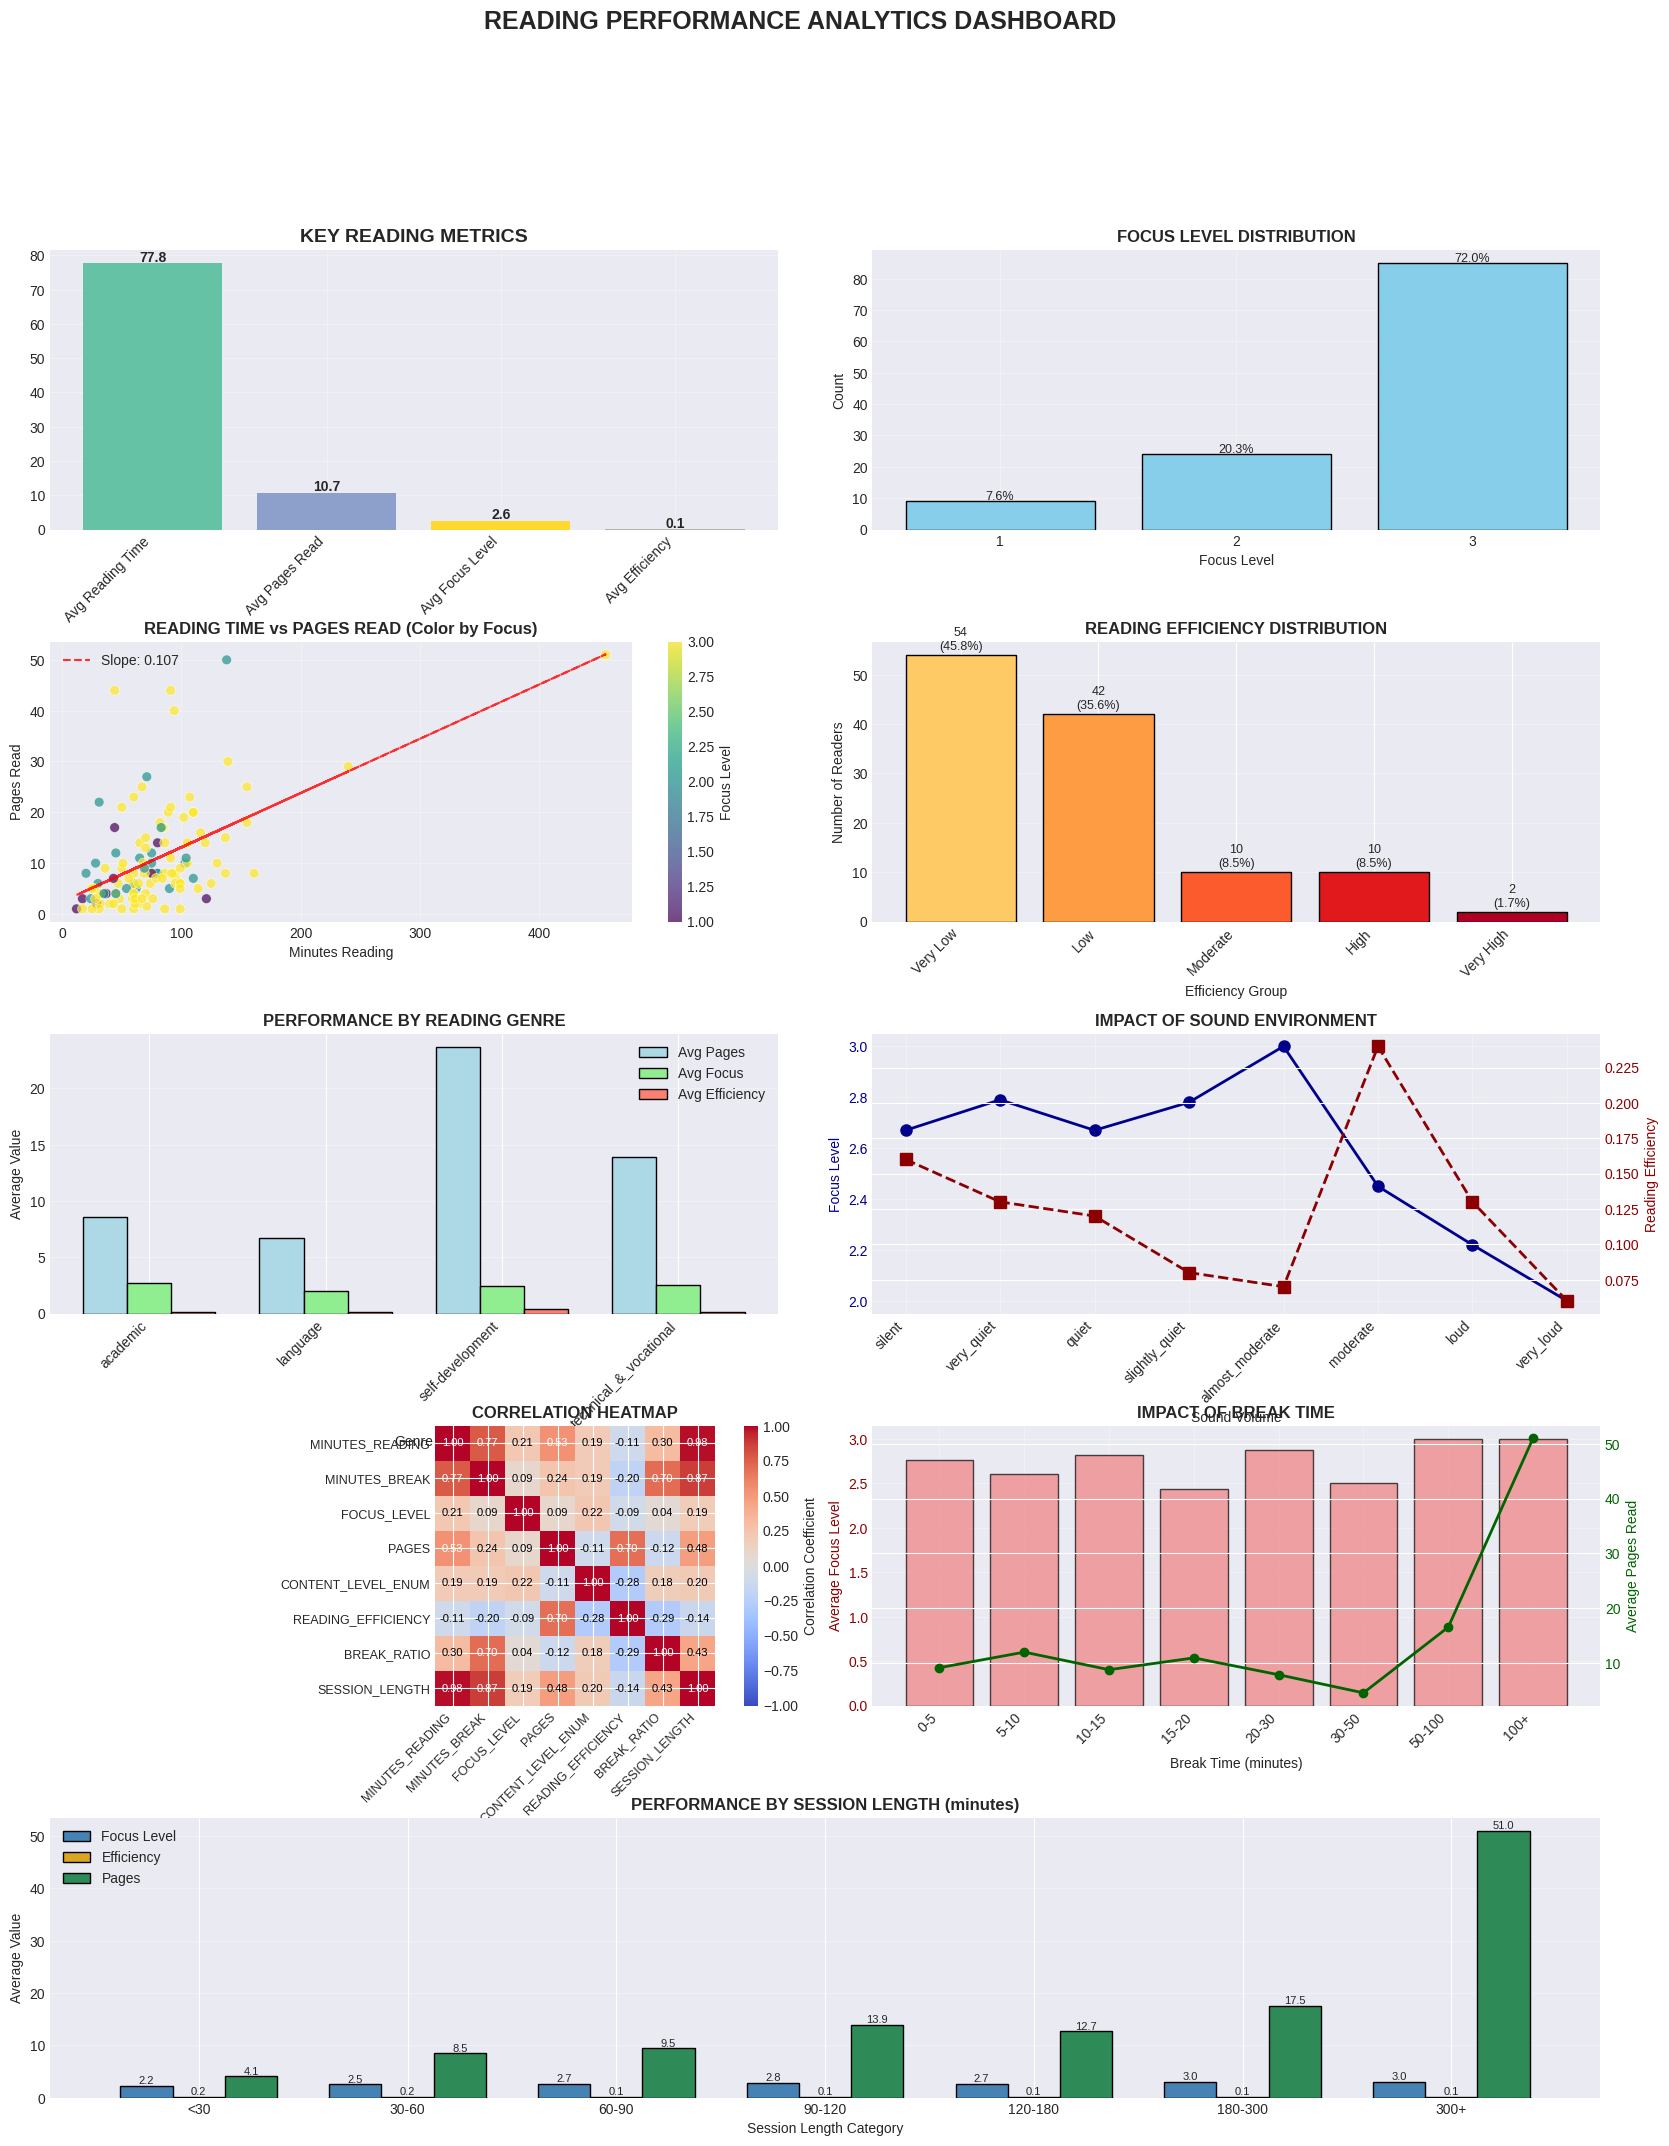

✓ Comprehensive dashboard saved as 'reading_performance_dashboard.png'

Creating interactive visualizations...
✓ Interactive visualizations saved as HTML files
✓ Animated visualization saved as 'animated_scatter.html'

Creating advanced analytics visualizations...
Advanced visualization error: Bin edges must be unique: Index([1.0, 3.0, 3.0, 3.0], dtype='float64', name='FOCUS_LEVEL').
You can drop duplicate edges by setting the 'duplicates' kwarg

Creating trend analysis visualizations...


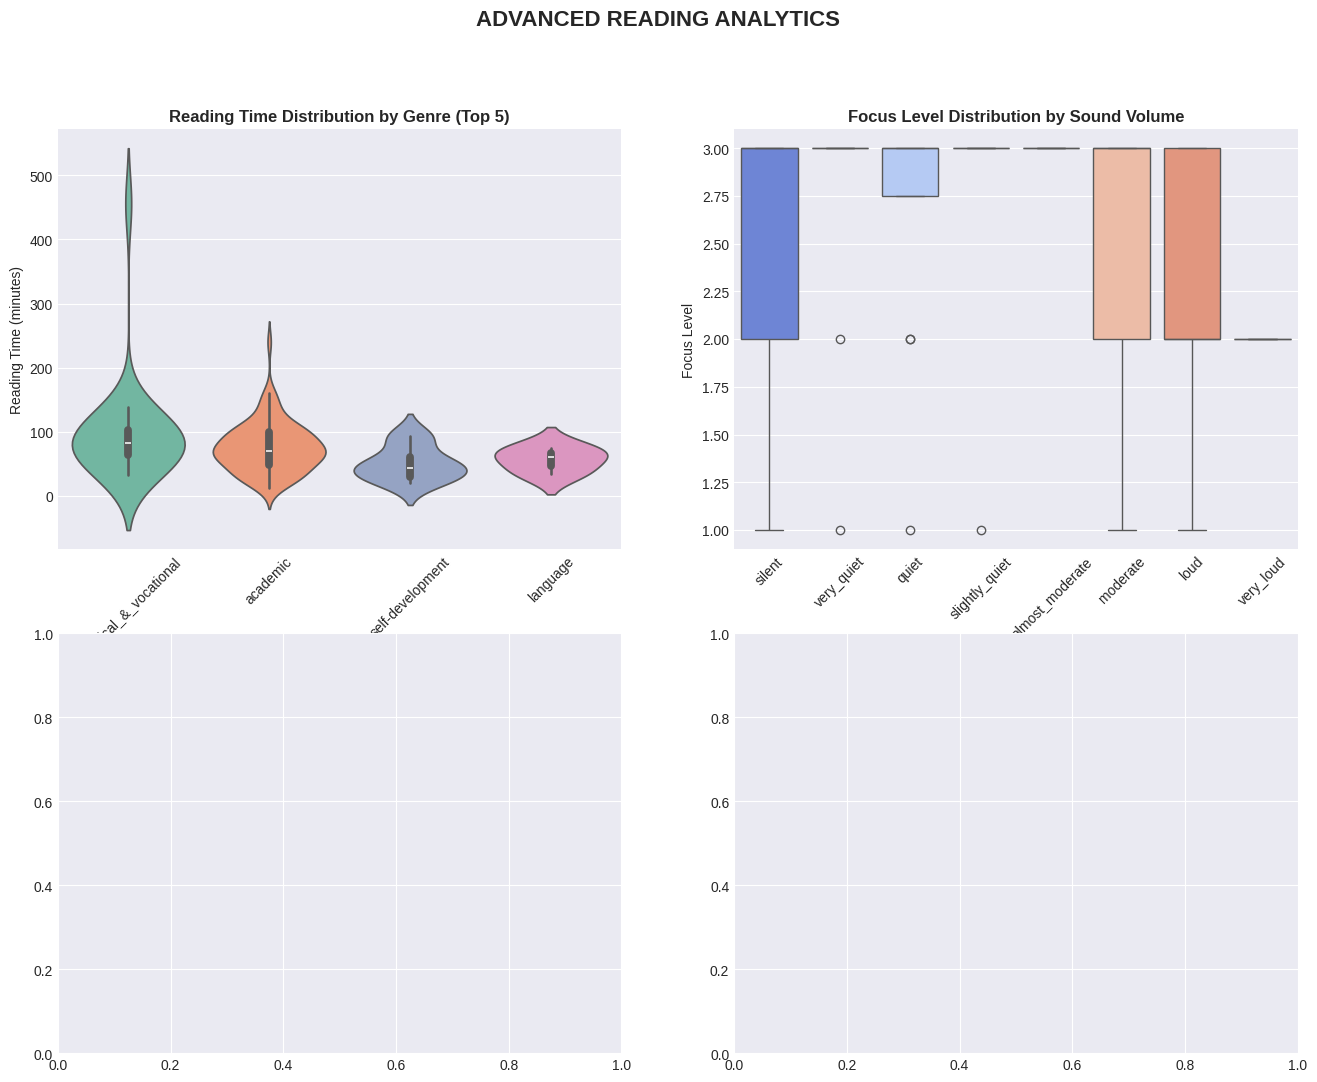

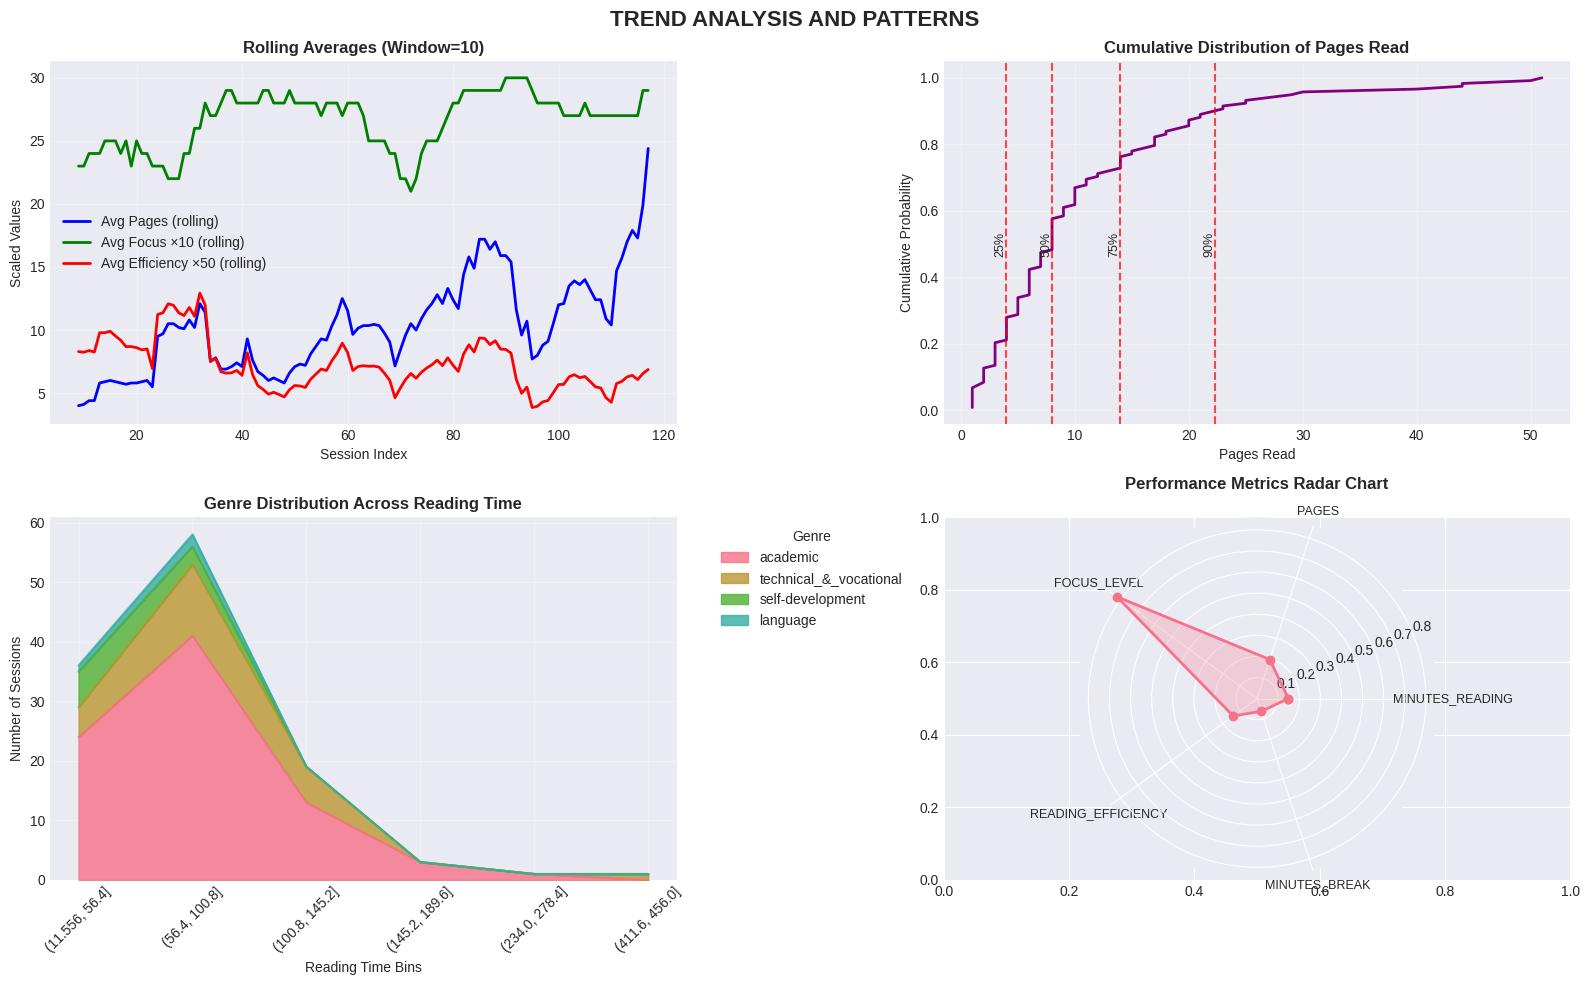

✓ Trend analysis saved as 'trend_analysis.png'

Creating quick insight visualizations...


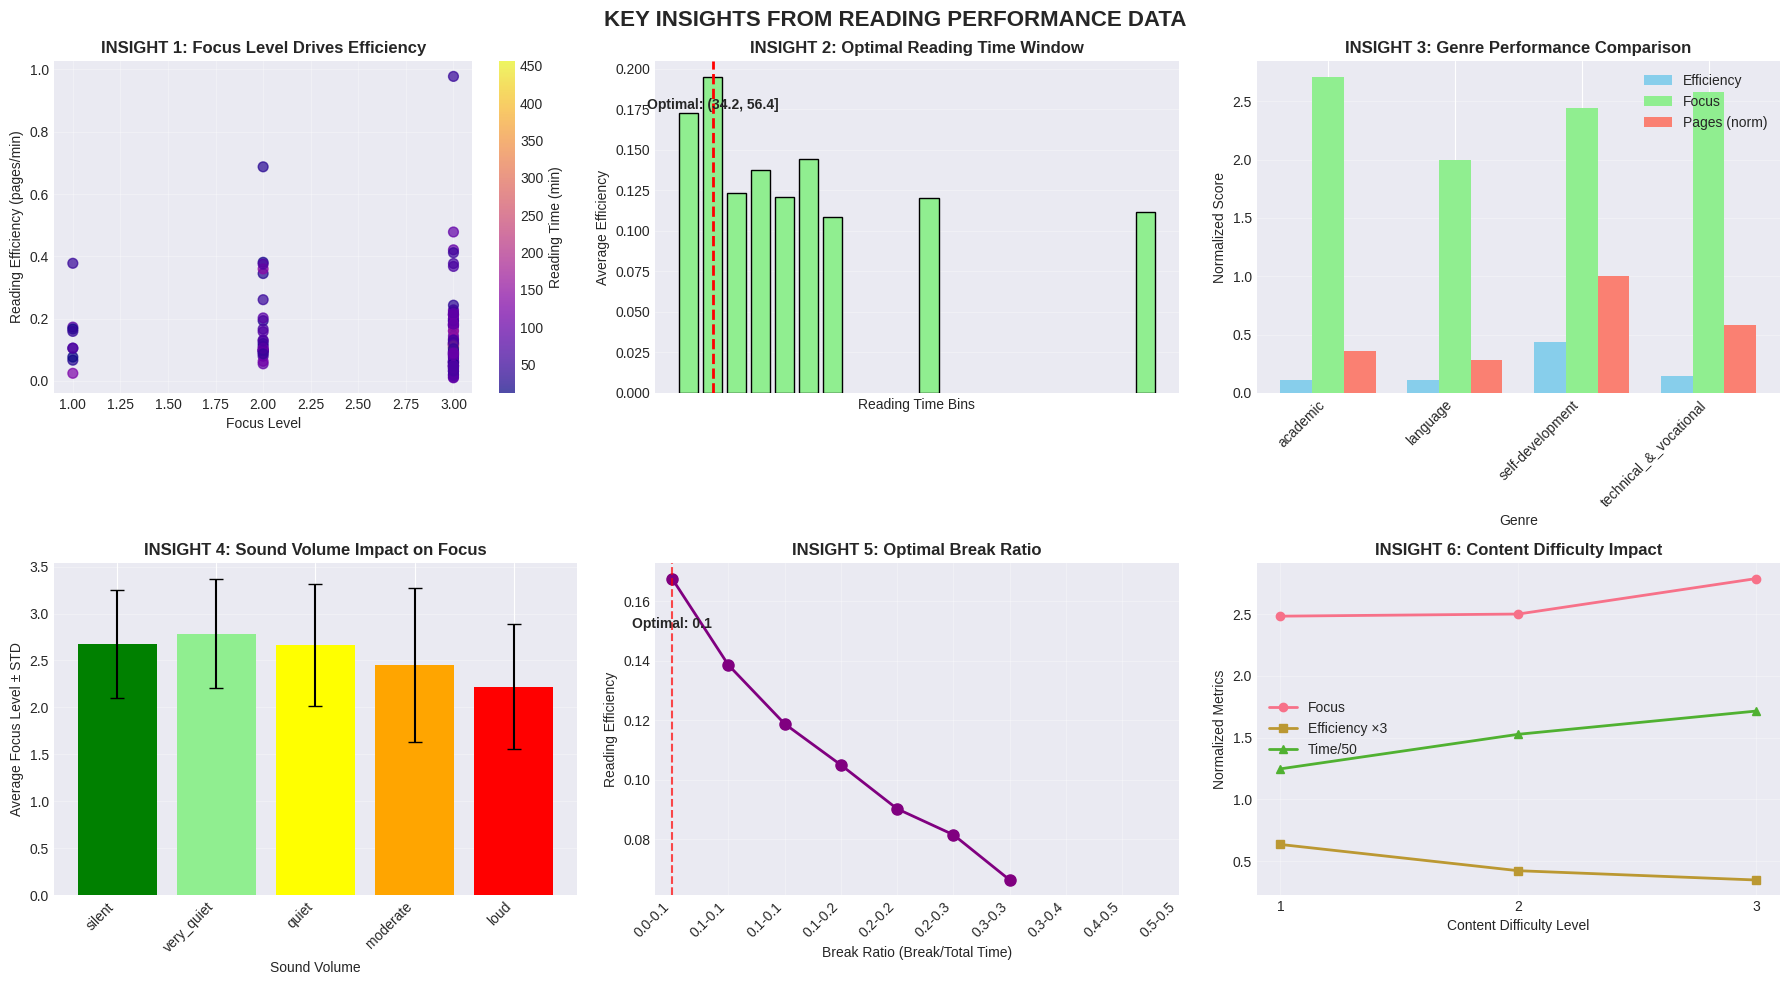

✓ Quick insights saved as 'quick_insights.png'

VISUALIZATION COMPLETE!

Files Created:
1. reading_performance_dashboard.png - Main dashboard
2. interactive_scatter.html - Interactive scatter plot
3. parallel_categories.html - Parallel coordinates
4. 3d_scatter.html - 3D visualization
5. sunburst.html - Sunburst chart
6. animated_scatter.html - Animated scatter plot
7. advanced_analytics.png - Advanced statistical plots
8. trend_analysis.png - Trend analysis
9. quick_insights.png - Key insights summary

To view interactive plots:
1. Open any HTML file in a web browser
2. Use: python -m http.server (for local server)


In [8]:

# Create derived features
df['READING_EFFICIENCY'] = df['PAGES'] / (df['MINUTES_READING'] + 1)
df['BREAK_RATIO'] = df['MINUTES_BREAK'] / (df['MINUTES_READING'] + df['MINUTES_BREAK'] + 1)
df['SESSION_LENGTH'] = df['MINUTES_READING'] + df['MINUTES_BREAK']

# ======================
# 1. COMPREHENSIVE DASHBOARD
# ======================

def create_comprehensive_dashboard():
    """Create a comprehensive dashboard with multiple visualizations"""
    
    fig = plt.figure(figsize=(20, 24))
    gs = GridSpec(5, 4, figure=fig, hspace=0.4, wspace=0.3)
    
    # ======================
    # 1.1 KEY METRICS OVERVIEW
    # ======================
    
    ax1 = fig.add_subplot(gs[0, :2])
    metrics = {
        'Avg Reading Time': df['MINUTES_READING'].mean(),
        'Avg Pages Read': df['PAGES'].mean(),
        'Avg Focus Level': df['FOCUS_LEVEL'].mean(),
        'Avg Efficiency': df['READING_EFFICIENCY'].mean()
    }
    
    colors = plt.cm.Set2(np.linspace(0, 1, len(metrics)))
    bars = ax1.bar(range(len(metrics)), list(metrics.values()), color=colors)
    ax1.set_title('KEY READING METRICS', fontsize=14, fontweight='bold')
    ax1.set_xticks(range(len(metrics)))
    ax1.set_xticklabels(list(metrics.keys()), rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for i, (bar, (key, val)) in enumerate(zip(bars, metrics.items())):
        ax1.text(i, bar.get_height() + 0.5, f'{val:.1f}', 
                ha='center', fontweight='bold', fontsize=10)
    
    # ======================
    # 1.2 DISTRIBUTION PLOTS
    # ======================
    
    # Focus Level Distribution
    ax2 = fig.add_subplot(gs[0, 2:])
    focus_counts = df['FOCUS_LEVEL'].value_counts().sort_index()
    ax2.bar(focus_counts.index.astype(str), focus_counts.values, 
           color='skyblue', edgecolor='black')
    ax2.set_title('FOCUS LEVEL DISTRIBUTION', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Focus Level')
    ax2.set_ylabel('Count')
    ax2.grid(True, alpha=0.3)
    
    # Add percentage labels
    total = len(df)
    for i, count in enumerate(focus_counts.values):
        percentage = (count / total) * 100
        ax2.text(i, count + 0.5, f'{percentage:.1f}%', 
                ha='center', fontsize=9)
    
    # ======================
    # 1.3 READING TIME VS PAGES
    # ======================
    
    ax3 = fig.add_subplot(gs[1, :2])
    scatter = ax3.scatter(df['MINUTES_READING'], df['PAGES'], 
                         c=df['FOCUS_LEVEL'], cmap='viridis', 
                         alpha=0.7, s=50, edgecolors='w', linewidth=0.5)
    ax3.set_title('READING TIME vs PAGES READ (Color by Focus)', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Minutes Reading')
    ax3.set_ylabel('Pages Read')
    ax3.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df['MINUTES_READING'], df['PAGES'], 1)
    p = np.poly1d(z)
    ax3.plot(df['MINUTES_READING'], p(df['MINUTES_READING']), 
            "r--", alpha=0.8, label=f'Slope: {z[0]:.3f}')
    ax3.legend()
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Focus Level')
    
    # ======================
    # 1.4 EFFICIENCY ANALYSIS
    # ======================
    
    ax4 = fig.add_subplot(gs[1, 2:])
    # Categorize efficiency
    efficiency_bins = [0, 0.1, 0.2, 0.3, 0.5, float('inf')]
    efficiency_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
    df['EFFICIENCY_GROUP'] = pd.cut(df['READING_EFFICIENCY'], 
                                   bins=efficiency_bins, 
                                   labels=efficiency_labels)
    
    efficiency_counts = df['EFFICIENCY_GROUP'].value_counts().sort_index()
    colors_eff = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(efficiency_counts)))
    bars_eff = ax4.bar(range(len(efficiency_counts)), efficiency_counts.values, 
                      color=colors_eff, edgecolor='black')
    ax4.set_title('READING EFFICIENCY DISTRIBUTION', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Efficiency Group')
    ax4.set_ylabel('Number of Readers')
    ax4.set_xticks(range(len(efficiency_counts)))
    ax4.set_xticklabels(efficiency_counts.index, rotation=45, ha='right')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels
    for i, (bar, count) in enumerate(zip(bars_eff, efficiency_counts.values)):
        percentage = (count / total) * 100
        ax4.text(i, bar.get_height() + 0.5, f'{count}\n({percentage:.1f}%)', 
                ha='center', fontsize=9, va='bottom')
    
    # ======================
    # 1.5 GENRE PERFORMANCE
    # ======================
    
    ax5 = fig.add_subplot(gs[2, :2])
    if 'READING_GENRE' in df.columns:
        genre_performance = df.groupby('READING_GENRE').agg({
            'PAGES': 'mean',
            'FOCUS_LEVEL': 'mean',
            'READING_EFFICIENCY': 'mean'
        }).round(2)
        
        x = np.arange(len(genre_performance))
        width = 0.25
        
        bars1 = ax5.bar(x - width, genre_performance['PAGES'], width, 
                       label='Avg Pages', color='lightblue', edgecolor='black')
        bars2 = ax5.bar(x, genre_performance['FOCUS_LEVEL'], width, 
                       label='Avg Focus', color='lightgreen', edgecolor='black')
        bars3 = ax5.bar(x + width, genre_performance['READING_EFFICIENCY'], width, 
                       label='Avg Efficiency', color='salmon', edgecolor='black')
        
        ax5.set_title('PERFORMANCE BY READING GENRE', fontsize=12, fontweight='bold')
        ax5.set_xlabel('Genre')
        ax5.set_ylabel('Average Value')
        ax5.set_xticks(x)
        ax5.set_xticklabels(genre_performance.index, rotation=45, ha='right')
        ax5.legend()
        ax5.grid(True, alpha=0.3, axis='y')
    
    # ======================
    # 1.6 SOUND ENVIRONMENT ANALYSIS
    # ======================
    
    ax6 = fig.add_subplot(gs[2, 2:])
    if 'SOUND_VOLUME' in df.columns:
        sound_order = ['silent', 'very_quiet', 'quiet', 'slightly_quiet', 
                      'almost_moderate', 'moderate', 'loud', 'very_loud']
        sound_data = df[df['SOUND_VOLUME'].isin(sound_order)]
        sound_performance = sound_data.groupby('SOUND_VOLUME').agg({
            'FOCUS_LEVEL': 'mean',
            'READING_EFFICIENCY': 'mean'
        }).reindex(sound_order).round(2)
        
        x_sound = np.arange(len(sound_performance))
        ax6.plot(x_sound, sound_performance['FOCUS_LEVEL'], 
                marker='o', linewidth=2, markersize=8, 
                label='Focus Level', color='darkblue')
        ax6.set_xlabel('Sound Volume')
        ax6.set_ylabel('Focus Level', color='darkblue')
        ax6.tick_params(axis='y', labelcolor='darkblue')
        ax6.set_xticks(x_sound)
        ax6.set_xticklabels(sound_performance.index, rotation=45, ha='right')
        
        ax6_eff = ax6.twinx()
        ax6_eff.plot(x_sound, sound_performance['READING_EFFICIENCY'], 
                    marker='s', linewidth=2, markersize=8, 
                    label='Efficiency', color='darkred', linestyle='--')
        ax6_eff.set_ylabel('Reading Efficiency', color='darkred')
        ax6_eff.tick_params(axis='y', labelcolor='darkred')
        
        ax6.set_title('IMPACT OF SOUND ENVIRONMENT', fontsize=12, fontweight='bold')
        ax6.grid(True, alpha=0.3)
    
    # ======================
    # 1.7 CORRELATION HEATMAP
    # ======================
    
    ax7 = fig.add_subplot(gs[3, :2])
    numeric_cols = ['MINUTES_READING', 'MINUTES_BREAK', 'FOCUS_LEVEL', 
                    'PAGES', 'CONTENT_LEVEL_ENUM', 'READING_EFFICIENCY', 
                    'BREAK_RATIO', 'SESSION_LENGTH']
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    
    correlation_matrix = df[numeric_cols].corr()
    
    im = ax7.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    ax7.set_title('CORRELATION HEATMAP', fontsize=12, fontweight='bold')
    ax7.set_xticks(range(len(numeric_cols)))
    ax7.set_yticks(range(len(numeric_cols)))
    ax7.set_xticklabels(numeric_cols, rotation=45, ha='right', fontsize=9)
    ax7.set_yticklabels(numeric_cols, fontsize=9)
    
    # Add correlation values
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            text = ax7.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                          ha="center", va="center", 
                          color="white" if abs(correlation_matrix.iloc[i, j]) > 0.5 else "black",
                          fontsize=8)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax7, fraction=0.046, pad=0.04)
    cbar.set_label('Correlation Coefficient')
    
    # ======================
    # 1.8 BREAK TIME ANALYSIS
    # ======================
    
    ax8 = fig.add_subplot(gs[3, 2:])
    break_bins = [0, 5, 10, 15, 20, 30, 50, 100, float('inf')]
    break_labels = ['0-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-100', '100+']
    df['BREAK_GROUP'] = pd.cut(df['MINUTES_BREAK'], bins=break_bins, labels=break_labels)
    
    break_focus = df.groupby('BREAK_GROUP').agg({
        'FOCUS_LEVEL': 'mean',
        'PAGES': 'mean'
    }).round(2)
    
    x_break = np.arange(len(break_focus))
    
    ax8.bar(x_break, break_focus['FOCUS_LEVEL'], 
           color='lightcoral', edgecolor='black', alpha=0.7, label='Avg Focus')
    ax8.set_xlabel('Break Time (minutes)')
    ax8.set_ylabel('Average Focus Level', color='darkred')
    ax8.tick_params(axis='y', labelcolor='darkred')
    ax8.set_xticks(x_break)
    ax8.set_xticklabels(break_focus.index, rotation=45, ha='right')
    
    ax8_pages = ax8.twinx()
    ax8_pages.plot(x_break, break_focus['PAGES'], 
                  marker='o', linewidth=2, markersize=6, 
                  color='darkgreen', label='Avg Pages')
    ax8_pages.set_ylabel('Average Pages Read', color='darkgreen')
    ax8_pages.tick_params(axis='y', labelcolor='darkgreen')
    
    ax8.set_title('IMPACT OF BREAK TIME', fontsize=12, fontweight='bold')
    ax8.grid(True, alpha=0.3)
    
    # ======================
    # 1.9 SESSION PATTERNS
    # ======================
    
    ax9 = fig.add_subplot(gs[4, :])
    
    # Create session length categories
    session_bins = [0, 30, 60, 90, 120, 180, 300, float('inf')]
    session_labels = ['<30', '30-60', '60-90', '90-120', '120-180', '180-300', '300+']
    df['SESSION_GROUP'] = pd.cut(df['SESSION_LENGTH'], bins=session_bins, labels=session_labels)
    
    session_stats = df.groupby('SESSION_GROUP').agg({
        'FOCUS_LEVEL': 'mean',
        'READING_EFFICIENCY': 'mean',
        'PAGES': 'mean'
    }).round(2)
    
    x_session = np.arange(len(session_stats))
    width = 0.25
    
    bars_s1 = ax9.bar(x_session - width, session_stats['FOCUS_LEVEL'], width,
                     label='Focus Level', color='steelblue', edgecolor='black')
    bars_s2 = ax9.bar(x_session, session_stats['READING_EFFICIENCY'], width,
                     label='Efficiency', color='goldenrod', edgecolor='black')
    bars_s3 = ax9.bar(x_session + width, session_stats['PAGES'], width,
                     label='Pages', color='seagreen', edgecolor='black')
    
    ax9.set_title('PERFORMANCE BY SESSION LENGTH (minutes)', fontsize=12, fontweight='bold')
    ax9.set_xlabel('Session Length Category')
    ax9.set_ylabel('Average Value')
    ax9.set_xticks(x_session)
    ax9.set_xticklabels(session_stats.index)
    ax9.legend(loc='upper left')
    ax9.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bars in [bars_s1, bars_s2, bars_s3]:
        for bar in bars:
            height = bar.get_height()
            ax9.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    # ======================
    # ADD OVERALL TITLE
    # ======================
    
    plt.suptitle('READING PERFORMANCE ANALYTICS DASHBOARD', 
                fontsize=18, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.savefig('reading_performance_dashboard.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✓ Comprehensive dashboard saved as 'reading_performance_dashboard.png'")

# ======================
# 2. INTERACTIVE PLOTLY VISUALIZATIONS
# ======================

def create_interactive_visualizations():
    """Create interactive visualizations using Plotly"""
    
    print("\nCreating interactive visualizations...")
    
    # 2.1 Interactive Scatter Plot
    fig1 = px.scatter(df, x='MINUTES_READING', y='PAGES',
                     color='FOCUS_LEVEL', size='READING_EFFICIENCY',
                     hover_data=['READING_GENRE', 'SOUND_VOLUME', 'CONTENT_LEVEL_ENUM'],
                     title='Interactive: Reading Time vs Pages Read',
                     labels={
                         'MINUTES_READING': 'Reading Time (minutes)',
                         'PAGES': 'Pages Read',
                         'FOCUS_LEVEL': 'Focus Level',
                         'READING_EFFICIENCY': 'Reading Efficiency'
                     })
    fig1.update_layout(width=1000, height=600)
    fig1.write_html('interactive_scatter.html')
    
    # 2.2 Parallel Coordinates Plot
    if 'READING_GENRE' in df.columns and 'SOUND_VOLUME' in df.columns:
        fig2 = px.parallel_categories(df, 
                                     dimensions=['READING_GENRE', 'SOUND_VOLUME', 'CONTENT_LEVEL_ENUM'],
                                     color='FOCUS_LEVEL',
                                     title='Parallel Categories: Reading Session Characteristics')
        fig2.update_layout(width=1000, height=600)
        fig2.write_html('parallel_categories.html')
    
    # 2.3 3D Scatter Plot
    fig3 = px.scatter_3d(df, x='MINUTES_READING', y='PAGES', z='FOCUS_LEVEL',
                        color='READING_EFFICIENCY',
                        hover_data=['READING_GENRE', 'SOUND_VOLUME'],
                        title='3D Visualization: Reading Performance Dimensions')
    fig3.update_layout(width=1000, height=800)
    fig3.write_html('3d_scatter.html')
    
    # 2.4 Sunburst Chart
    if 'READING_GENRE' in df.columns and 'SOUND_VOLUME' in df.columns:
        # Create categories for focus
        df['FOCUS_CATEGORY'] = pd.cut(df['FOCUS_LEVEL'], bins=[0, 1.5, 2.5, 3],
                                     labels=['Low', 'Medium', 'High'])
        
        fig4 = px.sunburst(df, path=['FOCUS_CATEGORY', 'READING_GENRE', 'SOUND_VOLUME'],
                          values='PAGES',
                          title='Sunburst: Focus, Genre, and Sound Volume Distribution')
        fig4.update_layout(width=800, height=800)
        fig4.write_html('sunburst.html')
    
    print("✓ Interactive visualizations saved as HTML files")
    
    # 2.5 Animation Plot
    if 'FOCUS_LEVEL' in df.columns and 'READING_GENRE' in df.columns:
        # Create animated scatter
        fig5 = px.scatter(df, x='MINUTES_READING', y='PAGES',
                         animation_frame='FOCUS_LEVEL',
                         color='READING_GENRE',
                         size='READING_EFFICIENCY',
                         hover_name='SOUND_VOLUME',
                         range_x=[df['MINUTES_READING'].min(), df['MINUTES_READING'].max()],
                         range_y=[df['PAGES'].min(), df['PAGES'].max()],
                         title='Animated: Reading Performance by Focus Level')
        fig5.write_html('animated_scatter.html')
    
    print("✓ Animated visualization saved as 'animated_scatter.html'")

# ======================
# 3. ADVANCED ANALYTICS VISUALIZATIONS
# ======================

def create_advanced_visualizations():
    """Create advanced statistical visualizations"""
    
    print("\nCreating advanced analytics visualizations...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('ADVANCED READING ANALYTICS', fontsize=16, fontweight='bold')
    
    # 3.1 Violin Plot - Reading Time Distribution
    ax1 = axes[0, 0]
    if 'READING_GENRE' in df.columns:
        genres_to_plot = df['READING_GENRE'].value_counts().nlargest(5).index
        genre_data = df[df['READING_GENRE'].isin(genres_to_plot)]
        sns.violinplot(data=genre_data, x='READING_GENRE', y='MINUTES_READING',
                      ax=ax1, palette='Set2')
        ax1.set_title('Reading Time Distribution by Genre (Top 5)', fontweight='bold')
        ax1.set_xlabel('Genre')
        ax1.set_ylabel('Reading Time (minutes)')
        ax1.tick_params(axis='x', rotation=45)
    
    # 3.2 Box Plot - Focus Level by Sound Volume
    ax2 = axes[0, 1]
    if 'SOUND_VOLUME' in df.columns:
        sound_order = ['silent', 'very_quiet', 'quiet', 'slightly_quiet', 
                      'almost_moderate', 'moderate', 'loud', 'very_loud']
        sound_data = df[df['SOUND_VOLUME'].isin(sound_order)]
        sns.boxplot(data=sound_data, x='SOUND_VOLUME', y='FOCUS_LEVEL',
                   order=sound_order, ax=ax2, palette='coolwarm')
        ax2.set_title('Focus Level Distribution by Sound Volume', fontweight='bold')
        ax2.set_xlabel('Sound Volume')
        ax2.set_ylabel('Focus Level')
        ax2.tick_params(axis='x', rotation=45)
    
    # 3.3 Heatmap - Efficiency Matrix
    ax3 = axes[1, 0]
    # Create efficiency matrix
    df['READING_TIME_CAT'] = pd.qcut(df['MINUTES_READING'], q=4, 
                                    labels=['Short', 'Medium', 'Long', 'Very Long'])
    df['FOCUS_CAT'] = pd.qcut(df['FOCUS_LEVEL'], q=3, 
                             labels=['Low', 'Medium', 'High'])
    
    efficiency_matrix = df.pivot_table(values='READING_EFFICIENCY',
                                      index='READING_TIME_CAT',
                                      columns='FOCUS_CAT',
                                      aggfunc='mean').round(3)
    
    sns.heatmap(efficiency_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
                ax=ax3, cbar_kws={'label': 'Reading Efficiency'})
    ax3.set_title('Reading Efficiency Matrix', fontweight='bold')
    ax3.set_xlabel('Focus Category')
    ax3.set_ylabel('Reading Time Category')
    
    # 3.4 Hexbin Plot - Reading Time vs Pages
    ax4 = axes[1, 1]
    hb = ax4.hexbin(df['MINUTES_READING'], df['PAGES'],
                    gridsize=30, cmap='viridis', bins='log')
    ax4.set_title('Reading Time vs Pages Density', fontweight='bold')
    ax4.set_xlabel('Reading Time (minutes)')
    ax4.set_ylabel('Pages Read')
    cb = plt.colorbar(hb, ax=ax4)
    cb.set_label('log10(count)')
    
    plt.tight_layout()
    plt.savefig('advanced_analytics.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✓ Advanced analytics saved as 'advanced_analytics.png'")

# ======================
# 4. TREND ANALYSIS VISUALIZATIONS
# ======================

def create_trend_analysis():
    """Create trend and time-series style visualizations"""
    
    print("\nCreating trend analysis visualizations...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('TREND ANALYSIS AND PATTERNS', fontsize=16, fontweight='bold')
    
    # 4.1 Rolling Average Trends
    ax1 = axes[0, 0]
    # Sort by reading time for trend analysis
    df_sorted = df.sort_values('MINUTES_READING').reset_index(drop=True)
    
    # Calculate rolling averages
    window_size = 10
    df_sorted['ROLLING_PAGES'] = df_sorted['PAGES'].rolling(window=window_size).mean()
    df_sorted['ROLLING_FOCUS'] = df_sorted['FOCUS_LEVEL'].rolling(window=window_size).mean()
    df_sorted['ROLLING_EFFICIENCY'] = df_sorted['READING_EFFICIENCY'].rolling(window=window_size).mean()
    
    ax1.plot(df_sorted.index, df_sorted['ROLLING_PAGES'], 
            label='Avg Pages (rolling)', linewidth=2, color='blue')
    ax1.plot(df_sorted.index, df_sorted['ROLLING_FOCUS'] * 10, 
            label='Avg Focus ×10 (rolling)', linewidth=2, color='green')
    ax1.plot(df_sorted.index, df_sorted['ROLLING_EFFICIENCY'] * 50, 
            label='Avg Efficiency ×50 (rolling)', linewidth=2, color='red')
    
    ax1.set_title(f'Rolling Averages (Window={window_size})', fontweight='bold')
    ax1.set_xlabel('Session Index')
    ax1.set_ylabel('Scaled Values')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 4.2 Cumulative Distribution
    ax2 = axes[0, 1]
    # Sort pages for CDF
    pages_sorted = np.sort(df['PAGES'])
    cdf = np.arange(1, len(pages_sorted) + 1) / len(pages_sorted)
    
    ax2.plot(pages_sorted, cdf, linewidth=2, color='purple')
    ax2.set_title('Cumulative Distribution of Pages Read', fontweight='bold')
    ax2.set_xlabel('Pages Read')
    ax2.set_ylabel('Cumulative Probability')
    ax2.grid(True, alpha=0.3)
    
    # Add percentiles
    percentiles = [25, 50, 75, 90]
    for p in percentiles:
        percentile_value = np.percentile(df['PAGES'], p)
        ax2.axvline(percentile_value, color='red', linestyle='--', alpha=0.7)
        ax2.text(percentile_value, 0.5, f'{p}%', 
                rotation=90, va='center', ha='right', fontsize=9)
    
    # 4.3 Stacked Area Chart
    ax3 = axes[1, 0]
    if 'READING_GENRE' in df.columns:
        # Get top genres
        top_genres = df['READING_GENRE'].value_counts().nlargest(4).index
        
        # Create binned reading time
        df['TIME_BIN'] = pd.cut(df['MINUTES_READING'], bins=10)
        time_bins_sorted = sorted(df['TIME_BIN'].unique())
        
        # Create pivot table
        genre_time_data = pd.DataFrame()
        
        for genre in top_genres:
            genre_df = df[df['READING_GENRE'] == genre]
            genre_counts = genre_df.groupby('TIME_BIN').size()
            genre_time_data[genre] = genre_counts.reindex(time_bins_sorted).fillna(0)
        
        # Plot stacked area
        genre_time_data.plot.area(ax=ax3, alpha=0.8)
        ax3.set_title('Genre Distribution Across Reading Time', fontweight='bold')
        ax3.set_xlabel('Reading Time Bins')
        ax3.set_ylabel('Number of Sessions')
        ax3.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)
    
    # 4.4 Radar Chart for Performance Metrics
    ax4 = axes[1, 1]
    
    # Calculate normalized metrics
    metrics = ['MINUTES_READING', 'PAGES', 'FOCUS_LEVEL', 
               'READING_EFFICIENCY', 'MINUTES_BREAK']
    metrics = [m for m in metrics if m in df.columns]
    
    # Normalize metrics (0-1 scale)
    normalized_metrics = {}
    for metric in metrics:
        min_val = df[metric].min()
        max_val = df[metric].max()
        normalized_metrics[metric] = (df[metric].mean() - min_val) / (max_val - min_val)
    
    # Create radar chart
    N = len(metrics)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = [normalized_metrics[m] for m in metrics]
    values += values[:1]  # Close the polygon
    angles += angles[:1]  # Close the angles
    
    ax4 = plt.subplot(2, 2, 4, projection='polar')
    ax4.plot(angles, values, 'o-', linewidth=2)
    ax4.fill(angles, values, alpha=0.25)
    ax4.set_xticks(angles[:-1])
    ax4.set_xticklabels(metrics, fontsize=9)
    ax4.set_title('Performance Metrics Radar Chart', fontweight='bold', pad=20)
    ax4.grid(True)
    
    plt.tight_layout()
    plt.savefig('trend_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✓ Trend analysis saved as 'trend_analysis.png'")

# ======================
# 5. QUICK INSIGHTS VISUALIZATIONS
# ======================

def create_quick_insights():
    """Create quick insight visualizations for presentation"""
    
    print("\nCreating quick insight visualizations...")
    
    fig = plt.figure(figsize=(18, 10))
    
    # 5.1 Insight 1: Focus vs Efficiency
    ax1 = plt.subplot(2, 3, 1)
    scatter = ax1.scatter(df['FOCUS_LEVEL'], df['READING_EFFICIENCY'],
                         c=df['MINUTES_READING'], cmap='plasma',
                         alpha=0.7, s=50)
    ax1.set_title('INSIGHT 1: Focus Level Drives Efficiency', fontweight='bold')
    ax1.set_xlabel('Focus Level')
    ax1.set_ylabel('Reading Efficiency (pages/min)')
    plt.colorbar(scatter, ax=ax1).set_label('Reading Time (min)')
    ax1.grid(True, alpha=0.3)
    
    # 5.2 Insight 2: Optimal Reading Time
    ax2 = plt.subplot(2, 3, 2)
    # Find optimal reading time window
    time_bins = pd.cut(df['MINUTES_READING'], bins=20)
    time_efficiency = df.groupby(time_bins)['READING_EFFICIENCY'].mean()
    
    ax2.bar(range(len(time_efficiency)), time_efficiency.values,
           color='lightgreen', edgecolor='black')
    ax2.set_title('INSIGHT 2: Optimal Reading Time Window', fontweight='bold')
    ax2.set_xlabel('Reading Time Bins')
    ax2.set_ylabel('Average Efficiency')
    ax2.set_xticks([])
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Mark optimal bin
    optimal_idx = time_efficiency.idxmax()
    optimal_bin_index = list(time_efficiency.index).index(optimal_idx)
    ax2.axvline(optimal_bin_index, color='red', linestyle='--', linewidth=2)
    ax2.text(optimal_bin_index, time_efficiency.max() * 0.9,
            f'Optimal: {optimal_idx}', ha='center', fontweight='bold')
    
    # 5.3 Insight 3: Genre Comparison
    ax3 = plt.subplot(2, 3, 3)
    if 'READING_GENRE' in df.columns:
        top_genres = df['READING_GENRE'].value_counts().nlargest(4).index
        genre_comparison = df[df['READING_GENRE'].isin(top_genres)]
        
        genre_stats = genre_comparison.groupby('READING_GENRE').agg({
            'READING_EFFICIENCY': 'mean',
            'FOCUS_LEVEL': 'mean',
            'PAGES': 'mean'
        })
        
        x = np.arange(len(genre_stats))
        width = 0.25
        
        ax3.bar(x - width, genre_stats['READING_EFFICIENCY'], width,
               label='Efficiency', color='skyblue')
        ax3.bar(x, genre_stats['FOCUS_LEVEL'], width,
               label='Focus', color='lightgreen')
        ax3.bar(x + width, genre_stats['PAGES'] / genre_stats['PAGES'].max(),
               width, label='Pages (norm)', color='salmon')
        
        ax3.set_title('INSIGHT 3: Genre Performance Comparison', fontweight='bold')
        ax3.set_xlabel('Genre')
        ax3.set_ylabel('Normalized Score')
        ax3.set_xticks(x)
        ax3.set_xticklabels(genre_stats.index, rotation=45, ha='right')
        ax3.legend()
        ax3.grid(True, alpha=0.3, axis='y')
    
    # 5.4 Insight 4: Sound Impact
    ax4 = plt.subplot(2, 3, 4)
    if 'SOUND_VOLUME' in df.columns:
        sound_order = ['silent', 'very_quiet', 'quiet', 'moderate', 'loud']
        sound_data = df[df['SOUND_VOLUME'].isin(sound_order)]
        
        sound_impact = sound_data.groupby('SOUND_VOLUME')['FOCUS_LEVEL'].agg(['mean', 'std'])
        sound_impact = sound_impact.reindex(sound_order)
        
        bars = ax4.bar(range(len(sound_impact)), sound_impact['mean'],
                      yerr=sound_impact['std'], capsize=5,
                      color=['green', 'lightgreen', 'yellow', 'orange', 'red'])
        ax4.set_title('INSIGHT 4: Sound Volume Impact on Focus', fontweight='bold')
        ax4.set_xlabel('Sound Volume')
        ax4.set_ylabel('Average Focus Level ± STD')
        ax4.set_xticks(range(len(sound_impact)))
        ax4.set_xticklabels(sound_impact.index, rotation=45, ha='right')
        ax4.grid(True, alpha=0.3, axis='y')
    
    # 5.5 Insight 5: Break Time Optimization
    ax5 = plt.subplot(2, 3, 5)
    # Calculate optimal break ratio
    break_ratio_bins = pd.cut(df['BREAK_RATIO'], bins=np.linspace(0, 0.5, 11))
    break_performance = df.groupby(break_ratio_bins)['READING_EFFICIENCY'].mean()
    
    ax5.plot(range(len(break_performance)), break_performance.values,
            marker='o', linewidth=2, markersize=8, color='purple')
    ax5.set_title('INSIGHT 5: Optimal Break Ratio', fontweight='bold')
    ax5.set_xlabel('Break Ratio (Break/Total Time)')
    ax5.set_ylabel('Reading Efficiency')
    ax5.set_xticks(range(len(break_performance)))
    ax5.set_xticklabels([f'{b.left:.1f}-{b.right:.1f}' 
                        for b in break_performance.index], rotation=45, ha='right')
    ax5.grid(True, alpha=0.3)
    
    # Mark optimal point
    optimal_break_idx = break_performance.idxmax()
    optimal_idx = list(break_performance.index).index(optimal_break_idx)
    ax5.axvline(optimal_idx, color='red', linestyle='--', alpha=0.7)
    ax5.text(optimal_idx, break_performance.max() * 0.9,
            f'Optimal: {optimal_break_idx.right:.1f}', ha='center', fontweight='bold')
    
    # 5.6 Insight 6: Content Difficulty
    ax6 = plt.subplot(2, 3, 6)
    if 'CONTENT_LEVEL_ENUM' in df.columns:
        content_stats = df.groupby('CONTENT_LEVEL_ENUM').agg({
            'FOCUS_LEVEL': 'mean',
            'READING_EFFICIENCY': 'mean',
            'MINUTES_READING': 'mean'
        })
        
        x_content = np.arange(len(content_stats))
        ax6.plot(x_content, content_stats['FOCUS_LEVEL'], 
                marker='o', label='Focus', linewidth=2)
        ax6.plot(x_content, content_stats['READING_EFFICIENCY'] * 3, 
                marker='s', label='Efficiency ×3', linewidth=2)
        ax6.plot(x_content, content_stats['MINUTES_READING'] / 50, 
                marker='^', label='Time/50', linewidth=2)
        
        ax6.set_title('INSIGHT 6: Content Difficulty Impact', fontweight='bold')
        ax6.set_xlabel('Content Difficulty Level')
        ax6.set_ylabel('Normalized Metrics')
        ax6.set_xticks(x_content)
        ax6.set_xticklabels(content_stats.index)
        ax6.legend()
        ax6.grid(True, alpha=0.3)
    
    plt.suptitle('KEY INSIGHTS FROM READING PERFORMANCE DATA', 
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('quick_insights.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✓ Quick insights saved as 'quick_insights.png'")

# ======================
# MAIN EXECUTION
# ======================

def main():
    """Main function to run all visualizations"""
    
    print("="*60)
    print("READING PERFORMANCE DATA VISUALIZATION SUITE")
    print("="*60)
    
    # Create all visualizations
    try:
        create_comprehensive_dashboard()
    except Exception as e:
        print(f"Dashboard creation error: {e}")
    
    try:
        create_interactive_visualizations()
    except Exception as e:
        print(f"Interactive visualization error: {e}")
    
    try:
        create_advanced_visualizations()
    except Exception as e:
        print(f"Advanced visualization error: {e}")
    
    try:
        create_trend_analysis()
    except Exception as e:
        print(f"Trend analysis error: {e}")
    
    try:
        create_quick_insights()
    except Exception as e:
        print(f"Quick insights error: {e}")
    
    print("\n" + "="*60)
    print("VISUALIZATION COMPLETE!")
    print("="*60)
    print("\nFiles Created:")
    print("1. reading_performance_dashboard.png - Main dashboard")
    print("2. interactive_scatter.html - Interactive scatter plot")
    print("3. parallel_categories.html - Parallel coordinates")
    print("4. 3d_scatter.html - 3D visualization")
    print("5. sunburst.html - Sunburst chart")
    print("6. animated_scatter.html - Animated scatter plot")
    print("7. advanced_analytics.png - Advanced statistical plots")
    print("8. trend_analysis.png - Trend analysis")
    print("9. quick_insights.png - Key insights summary")
    
    print("\nTo view interactive plots:")
    print("1. Open any HTML file in a web browser")
    print("2. Use: python -m http.server (for local server)")

# ======================
# INDIVIDUAL VISUALIZATION FUNCTIONS
# ======================

def create_specific_visualization(viz_type='dashboard'):
    """Create specific types of visualizations"""
    
    if viz_type == 'dashboard':
        create_comprehensive_dashboard()
    elif viz_type == 'interactive':
        create_interactive_visualizations()
    elif viz_type == 'advanced':
        create_advanced_visualizations()
    elif viz_type == 'trend':
        create_trend_analysis()
    elif viz_type == 'insights':
        create_quick_insights()
    else:
        print("Available visualization types:")
        print("- dashboard: Comprehensive dashboard")
        print("- interactive: Interactive HTML plots")
        print("- advanced: Advanced statistical plots")
        print("- trend: Trend analysis")
        print("- insights: Quick insights")

# Run the main function
if __name__ == "__main__":
    # Install required packages if needed
    print("Required packages:")
    print("pip install pandas numpy matplotlib seaborn plotly")
    
    # Run all visualizations
    main()
    
    # Or run specific visualization
    # create_specific_visualization('dashboard')
    # create_specific_visualization('interactive')

# PREPROCESSING FUNCTION FOR TRAINING

In [9]:

def preprocess_for_training(X, categorical_cols, numerical_cols, label_encoders=None, fit=True):
    """Preprocess data for training or inference"""
    X_processed = X.copy()
    
    # Encode categorical variables
    if label_encoders is None:
        label_encoders = {}
    
    for col in categorical_cols:
        if col in X_processed.columns:
            if fit:
                le = LabelEncoder()
                X_processed[col] = le.fit_transform(X_processed[col].astype(str))
                label_encoders[col] = le
            else:
                le = label_encoders.get(col)
                if le:
                    # Handle unseen labels during inference
                    try:
                        X_processed[col] = le.transform(X_processed[col].astype(str))
                    except:
                        # If unseen label, assign a special value
                        X_processed[col] = -1
      # Ensure all columns are numeric
    for col in X_processed.columns:
        if X_processed[col].dtype == 'object':
            # Try to convert to numeric if possible
            try:
                X_processed[col] = pd.to_numeric(X_processed[col], errors='coerce')
            except:
                # If conversion fails, use simple encoding
                X_processed[col] = X_processed[col].astype('category').cat.codes
    
    # Fill any remaining NaN values
    X_processed = X_processed.fillna(0)
    
    return X_processed, label_encoders

# MODEL 1: FOCUS LEVEL CLASSIFICATION

In [10]:

print("\n" + "="*50)
print("Training Focus Level Classifier...")
print("="*50)

# Prepare data for classification - use only original columns (no derived features for X)
X_class = df_processed.drop(['FOCUS_LEVEL', 'PAGES', 'READING_EFFICIENCY', 'BREAK_RATIO'], 
                          axis=1, errors='ignore')
y_class = df_processed['FOCUS_LEVEL']

# Check if FOCUS_LEVEL needs binning
print(f"Unique FOCUS_LEVEL values: {sorted(y_class.unique())}")
print(f"Distribution of FOCUS_LEVEL:\n{y_class.value_counts().sort_index()}")

# Convert to classification categories if needed
if y_class.nunique() > 5:
    # Create 3 categories
    bins = [-float('inf'), y_class.quantile(0.33), y_class.quantile(0.67), float('inf')]
    labels = ['Low', 'Medium', 'High']
    y_class = pd.cut(y_class, bins=bins, labels=labels)
    print(f"Binned FOCUS_LEVEL into categories: {labels}")

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class if y_class.dtype.name == 'category' else None
)
print(f"\nTraining set: {X_train_clf.shape}, Test set: {X_test_clf.shape}")

# Preprocess the training data
X_train_processed, label_encoders_clf = preprocess_for_training(
    X_train_clf, categorical_cols, numerical_cols, fit=True
)

# Scale features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_processed)

# Preprocess test data using the same encoders and scaler
X_test_processed, _ = preprocess_for_training(
    X_test_clf, categorical_cols, numerical_cols, label_encoders=label_encoders_clf, fit=False
)
X_test_clf_scaled = scaler_clf.transform(X_test_processed)

# Train Random Forest Classifier
print("\nTraining Random Forest Classifier...")
clf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1,
    max_depth=10,
    min_samples_split=5
)
clf.fit(X_train_clf_scaled, y_train_clf)

# Evaluate
y_pred_clf = clf.predict(X_test_clf_scaled)
print("\nFocus Level Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))

# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Focus Level Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix_focus.png')
plt.close()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_processed.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Features for Focus Level Prediction:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.title('Top 10 Features for Focus Level Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_focus.png')
plt.close()


Training Focus Level Classifier...
Unique FOCUS_LEVEL values: [np.int64(1), np.int64(2), np.int64(3)]
Distribution of FOCUS_LEVEL:
FOCUS_LEVEL
1     9
2    24
3    85
Name: count, dtype: int64

Training set: (94, 19), Test set: (24, 19)

Training Random Forest Classifier...

Focus Level Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.14      0.25         7
           3       0.65      1.00      0.79        15

    accuracy                           0.67        24
   macro avg       0.55      0.38      0.35        24
weighted avg       0.70      0.67      0.57        24


Top 10 Features for Focus Level Prediction:
                feature  importance
3       MINUTES_READING    0.138323
12               HUNGER    0.107451
15  COMPREHENSION_DEPTH    0.106183
18    INTERESTING_LEVEL    0.076854
5    CONTENT_LEVEL_ENUM    0.075345
7          SOUND_VOLUME    0.074751
4         

# MODEL 2: PAGES READ REGRESSION

In [11]:
print("\n" + "="*50)
print("Training Pages Read Regression Model...")
print("="*50)

# Prepare data for regression
X_reg = df_processed.drop(['PAGES', 'READING_EFFICIENCY', 'BREAK_RATIO'], 
                         axis=1, errors='ignore')
y_reg = df_processed['PAGES']

print(f"\nPages statistics:")
print(f"Min: {y_reg.min()}, Max: {y_reg.max()}, Mean: {y_reg.mean():.2f}, Std: {y_reg.std():.2f}")

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train_reg.shape}, Test set: {X_test_reg.shape}")

# Preprocess training data
X_train_reg_processed, label_encoders_reg = preprocess_for_training(
    X_train_reg, categorical_cols, numerical_cols, fit=True
)

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg_processed)

# Preprocess test data
X_test_reg_processed, _ = preprocess_for_training(
    X_test_reg, categorical_cols, numerical_cols, label_encoders=label_encoders_reg, fit=False
)
X_test_reg_scaled = scaler_reg.transform(X_test_reg_processed)

# Train XGBoost Regressor
print("\nTraining XGBoost Regressor...")

# OPTION 1: With early stopping (CORRECT WAY)
# early_stopping_rounds should be in constructor, not fit()
xgb_reg = xgb.XGBRegressor(
    n_estimators=1000,  # Set a high number since early stopping will stop early
    max_depth=6,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    early_stopping_rounds=20,  # Correct location for early stopping
    eval_metric='rmse'  # Add evaluation metric for early stopping
)

# Fit with evaluation set
xgb_reg.fit(
    X_train_reg_scaled, 
    y_train_reg,
    eval_set=[(X_test_reg_scaled, y_test_reg)],
    verbose=False
)

# OPTION 2: Alternative syntax (also valid in some XGBoost versions)
# xgb_reg = xgb.XGBRegressor(
#     n_estimators=1000,
#     max_depth=6,
#     learning_rate=0.05,
#     random_state=42,
#     n_jobs=-1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=0.1,
#     reg_lambda=1.0
# )
# 
# # Some versions require eval_metric in fit() for early stopping
# xgb_reg.fit(
#     X_train_reg_scaled, 
#     y_train_reg,
#     eval_set=[(X_test_reg_scaled, y_test_reg)],
#     early_stopping_rounds=20,  # If your version supports it here
#     eval_metric='rmse',
#     verbose=False
# )

# OPTION 3: Without early stopping (simplest)
# xgb_reg = xgb.XGBRegressor(
#     n_estimators=200,
#     max_depth=6,
#     learning_rate=0.05,
#     random_state=42,
#     n_jobs=-1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=0.1,
#     reg_lambda=1.0
# )
# 
# xgb_reg.fit(
#     X_train_reg_scaled, 
#     y_train_reg,
#     verbose=False
# )

# Check if early stopping was triggered
if hasattr(xgb_reg, 'best_iteration'):
    print(f"Early stopping triggered at iteration {xgb_reg.best_iteration}")
else:
    print("Training completed without early stopping")

# Evaluate
y_pred_reg = xgb_reg.predict(X_test_reg_scaled)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test_reg - y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"\nPages Read Regression Performance:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, label='Predictions')
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Pages')
plt.ylabel('Predicted Pages')
plt.title('Pages Read: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('regression_predictions.png', dpi=150)
plt.close()

# Residual plot
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Pages')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('regression_residuals.png', dpi=150)
plt.close()

# Feature importance
feature_importance_reg = pd.DataFrame({
    'feature': X_train_reg_processed.columns,
    'importance': xgb_reg.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Features for Pages Prediction:")
print(feature_importance_reg.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance_reg.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.title('Top 10 Features for Pages Read Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_pages.png', dpi=150)
plt.close()

# Learning curve (if early stopping was used)
if hasattr(xgb_reg, 'evals_result'):
    evals_result = xgb_reg.evals_result()
    
    plt.figure(figsize=(10, 6))
    epochs = len(evals_result['validation_0']['rmse'])
    x_axis = range(0, epochs)
    
    plt.plot(x_axis, evals_result['validation_0']['rmse'], label='Test RMSE')
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.title('XGBoost Learning Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('learning_curve.png', dpi=150)
    plt.close()
    
    print(f"\nBest RMSE on validation set: {min(evals_result['validation_0']['rmse']):.4f}")

# Additional diagnostics
print(f"\nAdditional Diagnostics:")
print(f"Mean Absolute Percentage Error: {np.mean(np.abs((y_test_reg - y_pred_reg) / y_test_reg)) * 100:.2f}%")
print(f"Max Error: {np.max(np.abs(y_test_reg - y_pred_reg)):.2f}")
print(f"Median Absolute Error: {np.median(np.abs(y_test_reg - y_pred_reg)):.2f}")

# Print example predictions
print(f"\nExample Predictions (First 5 test samples):")
for i in range(min(5, len(y_test_reg))):
    print(f"  Actual: {y_test_reg.iloc[i]:.1f}, Predicted: {y_pred_reg[i]:.1f}, Error: {y_test_reg.iloc[i] - y_pred_reg[i]:.1f}")


Training Pages Read Regression Model...

Pages statistics:
Min: 1.0, Max: 51.0, Mean: 10.74, Std: 10.07

Training set: (94, 20), Test set: (24, 20)

Training XGBoost Regressor...
Early stopping triggered at iteration 49

Pages Read Regression Performance:
MSE: 94.8089
RMSE: 9.7370
MAE: 6.3902
R² Score: 0.1307

Top 10 Features for Pages Prediction:
               feature  importance
7        READING_GENRE    0.174168
19   INTERESTING_LEVEL    0.127131
14             AROUSAL    0.092414
9               DEVICE    0.081000
5          FOCUS_LEVEL    0.058988
6   CONTENT_LEVEL_ENUM    0.054337
3      MINUTES_READING    0.053518
4        MINUTES_BREAK    0.050460
10            LOCATION    0.046390
15     MENTAL_IN_BREAK    0.043556

Best RMSE on validation set: 9.7370

Additional Diagnostics:
Mean Absolute Percentage Error: 66.64%
Max Error: 36.78
Median Absolute Error: 4.13

Example Predictions (First 5 test samples):
  Actual: 1.5, Predicted: 6.6, Error: -5.1
  Actual: 8.0, Predicted: 7.6,

#  MODEL 3: READING CLUSTERS (UNSUPERVISED)

In [12]:

print("\n" + "="*50)
print("Performing Reader Clustering...")
print("="*50)

# Select features for clustering
cluster_features = ['MINUTES_READING', 'FOCUS_LEVEL', 'PAGES', 
                    'READING_EFFICIENCY', 'BREAK_RATIO']
X_cluster = df_processed[cluster_features]

# Scale
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Find optimal k using elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)
# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig('elbow_curve.png')
plt.close()

# Choose k based on elbow (typically 3-4 from the plot)
# Let's calculate the optimal k using the elbow method
# Find the point where the decrease in inertia slows down
inertia_diff = np.diff(inertia)
inertia_diff_ratio = inertia_diff[1:] / inertia_diff[:-1]
optimal_k = np.argmin(inertia_diff_ratio) + 3  # +3 because we start from k=3

print(f"Suggested optimal k from elbow method: {optimal_k}")

# Use the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_processed['READER_CLUSTER'] = kmeans.fit_predict(X_cluster_scaled)

print(f"\nReader Clusters Created: {optimal_k} clusters")
print("Cluster distribution:")
print(df_processed['READER_CLUSTER'].value_counts().sort_index())

# Analyze cluster characteristics
cluster_analysis = df_processed.groupby('READER_CLUSTER')[cluster_features].mean()
print("\nCluster Characteristics (mean values):")
print(cluster_analysis)



Performing Reader Clustering...
Suggested optimal k from elbow method: 8

Reader Clusters Created: 8 clusters
Cluster distribution:
READER_CLUSTER
0    25
1    21
2    14
3    36
4     1
5     2
6    16
7     3
Name: count, dtype: int64

Cluster Characteristics (mean values):
                MINUTES_READING  FOCUS_LEVEL      PAGES  READING_EFFICIENCY  \
READER_CLUSTER                                                                
0                    101.640000     2.960000  18.920000            0.205650   
1                     89.761905     3.000000   6.023810            0.067713   
2                     74.142857     1.785714   8.071429            0.128950   
3                     58.416667     3.000000   5.194444            0.090484   
4                    456.000000     3.000000  51.000000            0.111597   
5                     37.500000     2.500000  33.000000            0.832639   
6                     47.312500     1.625000   7.312500            0.157514   
7          

#  AGENTIC AI SYSTEM CLASS (Updated with proper preprocessing)

In [13]:

class ReadingPerformanceAgent:
    """Agentic AI system for reading performance optimization"""
    
    def __init__(self, classifier, regressor, kmeans, scalers, label_encoders, feature_columns):
        self.classifier = classifier
        self.regressor = regressor
        self.kmeans = kmeans
        self.scalers = scalers
        self.label_encoders = label_encoders
        self.feature_columns = feature_columns
        self.cluster_descriptions = {}
        
    def _preprocess_features(self, features_dict):
        """Convert dictionary of features to properly formatted array"""
        # Create a DataFrame with the same structure as training data
        features_df = pd.DataFrame([features_dict])
        
        # Ensure all expected columns are present
        for col in self.feature_columns:
            if col not in features_df.columns:
                features_df[col] = 0  # Default value for missing columns
        
        # Reorder columns to match training data
        features_df = features_df[self.feature_columns]
        
        return features_df
    def _encode_features(self, features_df, encoder_type='clf'):
        """Encode and scale features"""
        # Encode categorical variables
        features_encoded = features_df.copy()
        le_dict = self.label_encoders.get(encoder_type, {})
        
        for col in features_encoded.columns:
            if col in le_dict:
                le = le_dict[col]
                try:
                    features_encoded[col] = le.transform(features_encoded[col].astype(str))
                except:
                    # Handle unseen labels
                    features_encoded[col] = -1
        
        # Convert all to numeric
        for col in features_encoded.columns:
            if features_encoded[col].dtype == 'object':
                try:
                    features_encoded[col] = pd.to_numeric(features_encoded[col], errors='coerce')
                except:
                    features_encoded[col] = 0
        
        features_encoded = features_encoded.fillna(0)
         # Scale features
        scaler = self.scalers.get(encoder_type)
        if scaler:
            features_scaled = scaler.transform(features_encoded)
        else:
            features_scaled = features_encoded.values
        
        return features_scaled
    
    def predict_focus_level(self, features_dict):
        """Predict focus level given reading session features"""
        try:
            features_df = self._preprocess_features(features_dict)
            features_scaled = self._encode_features(features_df, 'clf')
            
            focus_pred = self.classifier.predict(features_scaled)[0]
            focus_proba = self.classifier.predict_proba(features_scaled)[0]
            
            return {
                'predicted_focus': focus_pred,
                'confidence': float(max(focus_proba)),
                'probabilities': dict(zip(self.classifier.classes_, focus_proba))
            }
        except Exception as e:
            print(f"Error in focus prediction: {e}")
            return {'error': str(e)}

    def predict_pages(self, features_dict):
        """Predict number of pages that will be read"""
        try:
            features_df = self._preprocess_features(features_dict)
            features_scaled = self._encode_features(features_df, 'reg')
            
            pages_pred = self.regressor.predict(features_scaled)[0]
            
            # Calculate reading efficiency
            reading_time = features_dict.get('MINUTES_READING', 1)
            efficiency = float(pages_pred / (reading_time + 1))
            
            return {
                'predicted_pages': float(pages_pred),
                'reading_efficiency': efficiency
            }
        except Exception as e:
            print(f"Error in pages prediction: {e}")
            return {'error': str(e)}
    def get_reader_cluster(self, features_dict):
        """Determine which reader cluster the user belongs to"""
        try:
            # Extract cluster-relevant features
            cluster_features = [
                features_dict.get('MINUTES_READING', 0),
                features_dict.get('FOCUS_LEVEL', 2),
                features_dict.get('PAGES', 0),
                features_dict.get('READING_EFFICIENCY', 0),
                features_dict.get('BREAK_RATIO', 0)
            ]
            
            # Scale cluster features
            features_scaled = self.scalers['cluster'].transform([cluster_features])
            cluster = self.kmeans.predict(features_scaled)[0]
            
            return {
                'cluster': int(cluster),
                'cluster_description': self._get_cluster_description(cluster)
            }
        except Exception as e:
            print(f"Error in clustering: {e}")
            return {'error': str(e)}

    def optimize_reading_session(self, current_features, target_pages=None, target_focus=None):
        """Provide recommendations to optimize reading session"""
        
        try:
            recommendations = []
            
            # Analyze current state
            current_focus = self.predict_focus_level(current_features)
            current_pages = self.predict_pages(current_features)
            current_cluster = self.get_reader_cluster(current_features)
            
            if 'error' in current_focus or 'error' in current_pages or 'error' in current_cluster:
                return {'error': 'Failed to analyze current state'}
            
            # Generate recommendations based on goals
            if target_pages and current_pages['predicted_pages'] < target_pages:
                page_gap = target_pages - current_pages['predicted_pages']
                recommendations.append({
                    'type': 'pages_increase',
                    'action': 'Increase reading time by 20-30 minutes',
                    'expected_impact': f"Expected increase: {page_gap:.1f} pages",
                    'priority': 'high' if page_gap > 10 else 'medium'
                })
            
            if target_focus and isinstance(current_focus['predicted_focus'], (int, float)):
                if current_focus['predicted_focus'] < target_focus:
                    recommendations.append({
                        'type': 'focus_improvement',
                        'action': 'Choose a quieter environment and minimize distractions',
                        'expected_impact': 'Focus level improvement of 0.5-1.0 points',
                        'priority': 'high'
                    })
            # Personalized recommendation based on cluster
            cluster_recs = self._get_cluster_recommendations(current_cluster['cluster'])
            recommendations.extend(cluster_recs)
            
            # Add general recommendations
            if not recommendations:
                recommendations.append({
                    'type': 'maintenance',
                    'action': 'Continue with current reading habits',
                    'expected_impact': 'Maintain consistent performance',
                    'priority': 'low'
                })
            
            return {
                'current_state': {
                    'predicted_focus': current_focus['predicted_focus'],
                    'predicted_pages': current_pages['predicted_pages'],
                    'reading_efficiency': current_pages['reading_efficiency'],
                    'reader_cluster': current_cluster['cluster_description']
                },
                'recommendations': recommendations,
                'optimization_score': self._calculate_optimization_score(current_features, target_pages, target_focus)
            }
        except Exception as e:
            print(f"Error in optimization: {e}")
            return {'error': str(e)}

    def _get_cluster_description(self, cluster):
        """Get description of what the cluster represents"""
        descriptions = {
            0: "Balanced Readers - Moderate pace, good focus",
            1: "Efficient Readers - High focus, optimal pace",
            2: "Developing Readers - Variable focus, building consistency",
            3: "Extended Session Readers - Long reading times, moderate efficiency"
        }
        return descriptions.get(cluster, f"Cluster {cluster}")

    def _get_cluster_recommendations(self, cluster):
        """Get cluster-specific recommendations"""
        recommendations = {
            0: [{
                'type': 'balance',
                'action': 'Try alternating between different genres',
                'expected_impact': 'Improve engagement and retention',
                'priority': 'medium'
            }],
            1: [{
                'type': 'maintenance',
                'action': 'Continue current habits, consider mentoring others',
                'expected_impact': 'Maintain high performance levels',
                'priority': 'low'
            }],
            2: [{
                'type': 'development',
                'action': 'Use structured reading sessions with clear goals',
                'expected_impact': 'Increase consistency by 20-30%',
                'priority': 'high'
            }],
            3: [{
                'type': 'efficiency',
                'action': 'Take regular breaks (5 min every 45 min)',
                'expected_impact': 'Prevent fatigue, maintain efficiency',
                'priority': 'medium'
            }]
        }
        return recommendations.get(cluster, [])

    def _calculate_optimization_score(self, current_features, target_pages, target_focus):
        """Calculate optimization potential score (0-10)"""
        try:
            score = 0
            
            current_pages_pred = self.predict_pages(current_features)
            current_focus_pred = self.predict_focus_level(current_features)
            
            if 'error' in current_pages_pred or 'error' in current_focus_pred:
                return 0
            
            current_pages = current_pages_pred.get('predicted_pages', 0)
            current_focus = current_focus_pred.get('predicted_focus', 0)
            
            if target_pages and isinstance(current_pages, (int, float)):
                page_gap = target_pages - current_pages
                if page_gap > 0:
                    score += min(page_gap / 5, 5)  # Up to 5 points for pages
            
            if target_focus and isinstance(current_focus, (int, float)):
                focus_gap = target_focus - current_focus
                if focus_gap > 0:
                    score += min(focus_gap * 2, 5)  # Up to 5 points for focus
            
            return min(score, 10)  # Cap at 10
        except:
            return 0

    def save_agent(self, path='reading_agent.pkl'):
        """Save the trained agent"""
        agent_data = {
            'classifier': self.classifier,
            'regressor': self.regressor,
            'kmeans': self.kmeans,
            'scalers': self.scalers,
            'label_encoders': self.label_encoders,
            'feature_columns': self.feature_columns
        }
        joblib.dump(agent_data, path)
        print(f"Agent saved to {path}")
    
    @classmethod
    def load_agent(cls, path='reading_agent.pkl'):
        """Load a saved agent"""
        agent_data = joblib.load(path)
        return cls(**agent_data)

#  CREATE AND TRAIN THE AGENT

In [14]:

print("\n" + "="*50)
print("Creating Agentic AI System...")
print("="*50)

# Save scalers and encoders
scalers = {
    'clf': scaler_clf,
    'reg': scaler_reg,
    'cluster': scaler_cluster
}

label_encoders = {
    'clf': label_encoders_clf,
    'reg': label_encoders_reg
}

# Get feature columns from training data
feature_columns = X_train_processed.columns.tolist()

# Create agent
agent = ReadingPerformanceAgent(
    classifier=clf,
    regressor=xgb_reg,
    kmeans=kmeans,
    scalers=scalers,
    label_encoders=label_encoders,
    feature_columns=feature_columns
)

# Save the agent
agent.save_agent()


Creating Agentic AI System...
Agent saved to reading_agent.pkl


# EXAMPLE USAGE WITH PROPER FEATURE FORMATTING 

In [15]:

print("\n" + "="*50)
print("Example Agent Usage:")
print("="*50)

# Create example features based on actual column names from dataset
example_features = {
    'AGE_CATEGORY': 'young_adult',
    'GENDER': 'male',
    'MAJOR': 'student',
    'MINUTES_READING': 60,
    'MINUTES_BREAK': 10,
    'FOCUS_LEVEL': 2,
    'PAGES': 15,
    'CONTENT_LEVEL_ENUM': 2,
    'READING_GENRE': 'academic',
    'SOUND_VOLUME': 'silent',
    'READING_EFFICIENCY': 0.25,
    'BREAK_RATIO': 0.14
}

print("\nExample Features:")
for key, value in example_features.items():
    print(f"  {key}: {value}")

# Make predictions
print("\n1. Focus Level Prediction:")
focus_prediction = agent.predict_focus_level(example_features)
print(f"   Predicted Focus: {focus_prediction.get('predicted_focus', 'N/A')}")
print(f"   Confidence: {focus_prediction.get('confidence', 0):.2%}")

print("\n2. Pages Read Prediction:")
pages_prediction = agent.predict_pages(example_features)
print(f"   Predicted Pages: {pages_prediction.get('predicted_pages', 0):.1f}")
print(f"   Reading Efficiency: {pages_prediction.get('reading_efficiency', 0):.2f} pages/min")

print("\n3. Reader Clustering:")
cluster_info = agent.get_reader_cluster(example_features)
print(f"   Cluster: {cluster_info.get('cluster', 'N/A')}")
print(f"   Description: {cluster_info.get('cluster_description', 'N/A')}")

print("\n4. Optimization Recommendations:")
optimization = agent.optimize_reading_session(
    current_features=example_features,
    target_pages=25,  # Want to read 25 pages
    target_focus=3    # Want to achieve focus level 3
)

if 'error' in optimization:
    print(f"   Error: {optimization['error']}")
else:
    print(f"   Current State:")
    state = optimization['current_state']
    for key, value in state.items():
        print(f"     {key}: {value}")
    
    print(f"   Optimization Score: {optimization['optimization_score']:.1f}/10")
    
    print(f"\n   Recommendations:")
    for i, rec in enumerate(optimization['recommendations'], 1):
        print(f"   {i}. {rec['action']}")
        print(f"      Type: {rec['type']} | Priority: {rec.get('priority', 'medium')}")
        print(f"      Expected Impact: {rec.get('expected_impact', 'N/A')}")


Example Agent Usage:

Example Features:
  AGE_CATEGORY: young_adult
  GENDER: male
  MAJOR: student
  MINUTES_READING: 60
  MINUTES_BREAK: 10
  FOCUS_LEVEL: 2
  PAGES: 15
  CONTENT_LEVEL_ENUM: 2
  READING_GENRE: academic
  SOUND_VOLUME: silent
  READING_EFFICIENCY: 0.25
  BREAK_RATIO: 0.14

1. Focus Level Prediction:
   Predicted Focus: 3
   Confidence: 62.01%

2. Pages Read Prediction:
Error in pages prediction: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- FOCUS_LEVEL

   Predicted Pages: 0.0
   Reading Efficiency: 0.00 pages/min

3. Reader Clustering:
   Cluster: 2
   Description: Developing Readers - Variable focus, building consistency

4. Optimization Recommendations:
Error in pages prediction: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- FOCUS_LEVEL

   Error: Failed to analyze current state


# ADDITIONAL ANALYTICS


ADDITIONAL ANALYTICS:

1. OVERALL READING STATISTICS:
----------------------------------------
Average Reading Time (min)              : 77.78
Median Reading Time (min)               : 70.50
Average Pages Read                      : 10.74
Median Pages Read                       : 8.00
Average Focus Level                     : 2.64
Average Reading Efficiency (pages/min)  : 0.15
Average Break Time (min)                : 10.47
Average Break Ratio                     : 0.09

2. DISTRIBUTION ANALYSIS:
----------------------------------------

Focus Level Distribution:
  Level 1: 9 sessions (7.6%)
  Level 2: 24 sessions (20.3%)
  Level 3: 85 sessions (72.0%)

Reading Time Distribution:
  <30min: 12 sessions (10.2%)
  30-60min: 32 sessions (27.1%)
  60-90min: 37 sessions (31.4%)
  90-120min: 25 sessions (21.2%)
  120-150min: 7 sessions (5.9%)
  150-180min: 3 sessions (2.5%)
  >180min: 2 sessions (1.7%)

3. READING PERFORMANCE BY GENRE:
----------------------------------------

Genre-wise Per

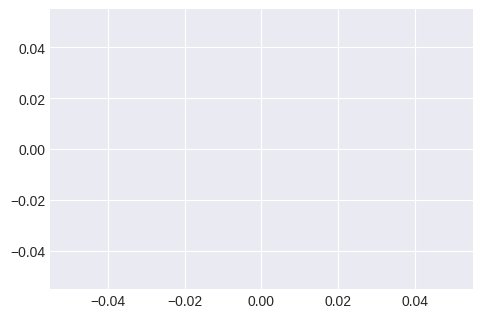

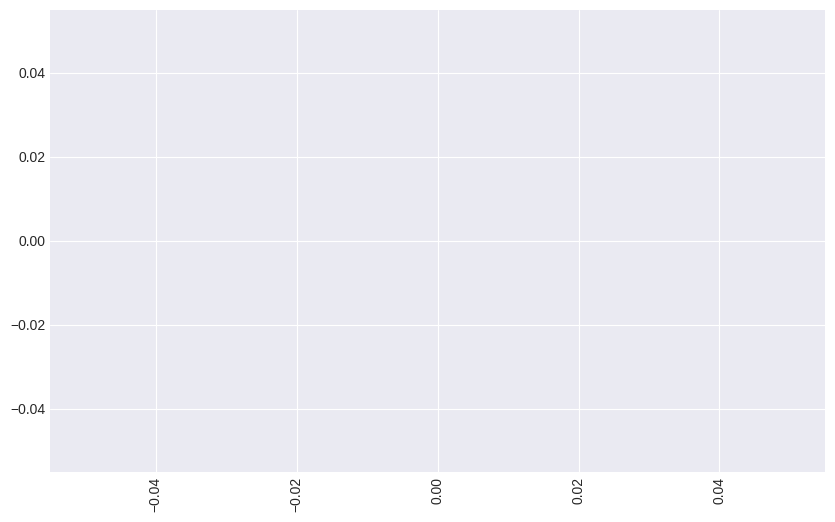

In [16]:
print("\n" + "="*50)
print("ADDITIONAL ANALYTICS:")
print("="*50)

# 10.1. Overall Reading Statistics
print("\n1. OVERALL READING STATISTICS:")
print("-" * 40)
overall_stats = {
    'Average Reading Time (min)': df_processed['MINUTES_READING'].mean(),
    'Median Reading Time (min)': df_processed['MINUTES_READING'].median(),
    'Average Pages Read': df_processed['PAGES'].mean(),
    'Median Pages Read': df_processed['PAGES'].median(),
    'Average Focus Level': df_processed['FOCUS_LEVEL'].mean(),
    'Average Reading Efficiency (pages/min)': df_processed['READING_EFFICIENCY'].mean(),
    'Average Break Time (min)': df_processed['MINUTES_BREAK'].mean(),
    'Average Break Ratio': df_processed['BREAK_RATIO'].mean()
}

for stat, value in overall_stats.items():
    print(f"{stat:40}: {value:.2f}")

# 10.2. Distribution Analysis
print("\n2. DISTRIBUTION ANALYSIS:")
print("-" * 40)
print("\nFocus Level Distribution:")
focus_dist = df_processed['FOCUS_LEVEL'].value_counts().sort_index()
for level, count in focus_dist.items():
    percentage = (count / len(df_processed)) * 100
    print(f"  Level {level}: {count} sessions ({percentage:.1f}%)")

print("\nReading Time Distribution:")
time_bins = [0, 30, 60, 90, 120, 150, 180, float('inf')]
time_labels = ['<30min', '30-60min', '60-90min', '90-120min', '120-150min', '150-180min', '>180min']
df_processed['TIME_CATEGORY'] = pd.cut(df_processed['MINUTES_READING'], bins=time_bins, labels=time_labels)
time_dist = df_processed['TIME_CATEGORY'].value_counts().sort_index()
for category, count in time_dist.items():
    percentage = (count / len(df_processed)) * 100
    print(f"  {category}: {count} sessions ({percentage:.1f}%)")

# 10.3. Reading Performance by Genre (using original column before encoding)
print("\n3. READING PERFORMANCE BY GENRE:")
print("-" * 40)

# Get original genre values from label encoder if available
if 'READING_GENRE' in df.columns and 'READING_GENRE' in label_encoders_clf:
    try:
        # Create a mapping of encoded values to original genre names
        genre_le = label_encoders_clf['READING_GENRE']
        genre_mapping = dict(zip(range(len(genre_le.classes_)), genre_le.classes_))
        
        # Create decoded genre column
        df_processed['READING_GENRE_ORIGINAL'] = df_processed['READING_GENRE'].map(genre_mapping)
        
        genre_stats = df_processed.groupby('READING_GENRE_ORIGINAL').agg({
            'PAGES': ['count', 'mean', 'median', 'std'],
            'FOCUS_LEVEL': ['mean', 'median'],
            'READING_EFFICIENCY': ['mean', 'median'],
            'MINUTES_READING': ['mean', 'median']
        }).round(2)
        
        print("\nGenre-wise Performance Summary:")
        print(genre_stats)
        
        # Create visualization
        plt.figure(figsize=(12, 8))
        
        # Subplot 1: Average Pages by Genre
        plt.subplot(2, 2, 1)
        genre_pages = df_processed.groupby('READING_GENRE_ORIGINAL')['PAGES'].mean().sort_values()
        genre_pages.plot(kind='barh', color='skyblue')
        plt.title('Average Pages Read by Genre')
        plt.xlabel('Average Pages')
        
        # Subplot 2: Average Focus by Genre
        plt.subplot(2, 2, 2)
        genre_focus = df_processed.groupby('READING_GENRE_ORIGINAL')['FOCUS_LEVEL'].mean().sort_values()
        genre_focus.plot(kind='barh', color='lightgreen')
        plt.title('Average Focus Level by Genre')
        plt.xlabel('Average Focus Level')
        
        # Subplot 3: Efficiency by Genre
        plt.subplot(2, 2, 3)
        genre_efficiency = df_processed.groupby('READING_GENRE_ORIGINAL')['READING_EFFICIENCY'].mean().sort_values()
        genre_efficiency.plot(kind='barh', color='salmon')
        plt.title('Average Reading Efficiency by Genre')
        plt.xlabel('Pages per Minute')
        
        # Subplot 4: Reading Time by Genre
        plt.subplot(2, 2, 4)
        genre_time = df_processed.groupby('READING_GENRE_ORIGINAL')['MINUTES_READING'].mean().sort_values()
        genre_time.plot(kind='barh', color='gold')
        plt.title('Average Reading Time by Genre')
        plt.xlabel('Minutes')
        
        plt.tight_layout()
        plt.savefig('genre_analysis.png', dpi=300, bbox_inches='tight')
        plt.close()
        print("\n✓ Genre analysis visualization saved as 'genre_analysis.png'")
        
    except Exception as e:
        print(f"Note: Could not decode genres for analysis. Error: {e}")
        print("Using encoded genre values for analysis...")
        
        genre_stats = df_processed.groupby('READING_GENRE').agg({
            'PAGES': ['mean', 'median'],
            'FOCUS_LEVEL': ['mean', 'median']
        }).round(2)
        print(genre_stats)

# 10.4. Reading Performance by Sound Volume
print("\n4. READING PERFORMANCE BY SOUND ENVIRONMENT:")
print("-" * 40)

if 'SOUND_VOLUME' in df.columns and 'SOUND_VOLUME' in label_encoders_clf:
    try:
        sound_le = label_encoders_clf['SOUND_VOLUME']
        sound_mapping = dict(zip(range(len(sound_le.classes_)), sound_le.classes_))
        df_processed['SOUND_VOLUME_ORIGINAL'] = df_processed['SOUND_VOLUME'].map(sound_mapping)
        
        sound_stats = df_processed.groupby('SOUND_VOLUME_ORIGINAL').agg({
            'FOCUS_LEVEL': ['mean', 'count'],
            'READING_EFFICIENCY': 'mean',
            'PAGES': 'mean',
            'MINUTES_READING': 'mean'
        }).round(2).sort_values(('FOCUS_LEVEL', 'mean'), ascending=False)
        
        print("\nPerformance by Sound Environment:")
        print(sound_stats)
        
        # Visualize focus level by sound volume
        plt.figure(figsize=(10, 6))
        sound_focus = df_processed.groupby('SOUND_VOLUME_ORIGINAL')['FOCUS_LEVEL'].mean().sort_values()
        sound_focus.plot(kind='bar', color='lightcoral')
        plt.title('Average Focus Level by Sound Environment')
        plt.xlabel('Sound Volume Level')
        plt.ylabel('Average Focus Level')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('sound_analysis.png', dpi=300, bbox_inches='tight')
        plt.close()
        print("\n✓ Sound environment analysis saved as 'sound_analysis.png'")
        
    except Exception as e:
        print(f"Note: Could not analyze sound environment. Error: {e}")

# 10.5. Correlation Analysis
print("\n5. CORRELATION ANALYSIS:")
print("-" * 40)

# Select key numerical features for correlation
corr_features = ['MINUTES_READING', 'MINUTES_BREAK', 'FOCUS_LEVEL', 
                 'PAGES', 'CONTENT_LEVEL_ENUM', 'READING_EFFICIENCY', 'BREAK_RATIO']

correlation_matrix = df_processed[corr_features].corr()

print("\nCorrelation Matrix (Top Correlations):")
# Get top correlations (absolute value > 0.3)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_value
            ))

# Sort by absolute correlation value
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

for feature1, feature2, corr in strong_correlations:
    direction = "positive" if corr > 0 else "negative"
    print(f"  {feature1} ↔ {feature2}: {corr:.3f} ({direction})")

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()
print("\n✓ Correlation heatmap saved as 'correlation_heatmap.png'")

# 10.6. Efficiency Analysis
print("\n6. READING EFFICIENCY ANALYSIS:")
print("-" * 40)

# Categorize readers by efficiency
efficiency_bins = [0, 0.1, 0.2, 0.3, 0.5, float('inf')]
efficiency_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
df_processed['EFFICIENCY_GROUP'] = pd.cut(df_processed['READING_EFFICIENCY'], 
                                         bins=efficiency_bins, 
                                         labels=efficiency_labels)

efficiency_stats = df_processed.groupby('EFFICIENCY_GROUP').agg({
    'PAGES': 'mean',
    'MINUTES_READING': 'mean',
    'FOCUS_LEVEL': 'mean',
    'MINUTES_BREAK': 'mean',
    'BREAK_RATIO': 'mean'
}).round(2)

print("\nPerformance by Efficiency Group:")
print(efficiency_stats)

# Visualize efficiency groups
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
efficiency_counts = df_processed['EFFICIENCY_GROUP'].value_counts().sort_index()
efficiency_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Readers by Efficiency Group')
plt.xlabel('Efficiency Group')
plt.ylabel('Number of Readers')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
efficiency_focus = df_processed.groupby('EFFICIENCY_GROUP')['FOCUS_LEVEL'].mean().sort_index()
efficiency_focus.plot(kind='bar', color='purple')
plt.title('Average Focus Level by Efficiency Group')
plt.xlabel('Efficiency Group')
plt.ylabel('Average Focus Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('efficiency_analysis.png', dpi=300, bbox_inches='tight')
plt.close()
print("\n✓ Efficiency analysis saved as 'efficiency_analysis.png'")

# 10.7. Cluster Analysis Details
print("\n7. READER CLUSTER ANALYSIS:")
print("-" * 40)

if 'READER_CLUSTER' in df_processed.columns:
    cluster_analysis = df_processed.groupby('READER_CLUSTER').agg({
        'MINUTES_READING': ['mean', 'std', 'count'],
        'PAGES': ['mean', 'std'],
        'FOCUS_LEVEL': ['mean', 'std'],
        'READING_EFFICIENCY': ['mean', 'std'],
        'BREAK_RATIO': ['mean', 'std']
    }).round(2)
    
    print("\nDetailed Cluster Analysis:")
    print(cluster_analysis)
    
    # Create cluster profiles
    print("\nCluster Profiles:")
    for cluster_id in sorted(df_processed['READER_CLUSTER'].unique()):
        cluster_data = df_processed[df_processed['READER_CLUSTER'] == cluster_id]
        profile = {
            'Size': len(cluster_data),
            'Percentage': f"{(len(cluster_data)/len(df_processed)*100):.1f}%",
            'Avg Reading Time': f"{cluster_data['MINUTES_READING'].mean():.1f} min",
            'Avg Pages': f"{cluster_data['PAGES'].mean():.1f}",
            'Avg Focus': f"{cluster_data['FOCUS_LEVEL'].mean():.2f}",
            'Avg Efficiency': f"{cluster_data['READING_EFFICIENCY'].mean():.3f} pages/min",
            'Avg Break Ratio': f"{cluster_data['BREAK_RATIO'].mean():.3f}"
        }
        print(f"\nCluster {cluster_id} ({profile['Size']} readers, {profile['Percentage']}):")
        for key, value in profile.items():
            if key not in ['Size', 'Percentage']:
                print(f"  {key:20}: {value}")

# 10.8. Model Performance Summary
print("\n8. MODEL PERFORMANCE SUMMARY:")
print("-" * 40)

print("\nFocus Level Classifier:")
print(f"  - Target Variable: FOCUS_LEVEL")
print(f"  - Model Type: Random Forest Classifier")
print(f"  - Classes: {len(clf.classes_)}")
print(f"  - Training Samples: {X_train_clf_scaled.shape[0]}")
print(f"  - Test Samples: {X_test_clf_scaled.shape[0]}")
print(f"  - Top Features: {feature_importance.head(3)['feature'].tolist()}")

print("\nPages Read Regressor:")
print(f"  - Target Variable: PAGES")
print(f"  - Model Type: XGBoost Regressor")
print(f"  - R² Score: {r2:.4f}")
print(f"  - RMSE: {rmse:.4f}")
print(f"  - MAE: {mae:.4f}")
print(f"  - Training Samples: {X_train_reg_scaled.shape[0]}")
print(f"  - Test Samples: {X_test_reg_scaled.shape[0]}")

print("\nReader Clustering:")
print(f"  - Number of Clusters: {optimal_k}")
print(f"  - Method: K-Means Clustering")
print(f"  - Features Used: {cluster_features}")
print(f"  - Cluster Sizes: {dict(df_processed['READER_CLUSTER'].value_counts().sort_index())}")

# 10.9. Key Insights
print("\n9. KEY INSIGHTS:")
print("-" * 40)

insights = [
    f"1. Average reading session: {df_processed['MINUTES_READING'].mean():.1f} minutes",
    f"2. Average pages per session: {df_processed['PAGES'].mean():.1f}",
    f"3. Most common focus level: {df_processed['FOCUS_LEVEL'].mode()[0]}",
    f"4. Average reading efficiency: {df_processed['READING_EFFICIENCY'].mean():.3f} pages/minute",
    f"5. Break time ratio: {df_processed['BREAK_RATIO'].mean():.3f}",
    f"6. Focus-FE correlation: {df_processed['FOCUS_LEVEL'].corr(df_processed['READING_EFFICIENCY']):.3f}",
    f"7. Top efficiency range: {efficiency_counts.idxmax()} ({efficiency_counts.max()} readers)",
    f"8. Optimal clusters identified: {optimal_k}",
    f"9. Model accuracy: Focus classification - see confusion matrix",
    f"10. Pages prediction R²: {r2:.4f}"
]

for insight in insights:
    print(f"  {insight}")

# 10.10. Export Analytics Summary
print("\n10. EXPORTING ANALYTICS:")
print("-" * 40)

# Create summary DataFrame
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Sessions', 'Average Reading Time (min)', 'Average Pages Read',
        'Average Focus Level', 'Average Reading Efficiency', 'Average Break Ratio',
        'Focus Classification Accuracy', 'Pages Prediction R²', 'Number of Clusters'
    ],
    'Value': [
        len(df_processed),
        df_processed['MINUTES_READING'].mean(),
        df_processed['PAGES'].mean(),
        df_processed['FOCUS_LEVEL'].mean(),
        df_processed['READING_EFFICIENCY'].mean(),
        df_processed['BREAK_RATIO'].mean(),
        'See classification report',
        r2,
        optimal_k
    ]
})

# Export to CSV
summary_stats.to_csv('reading_analytics_summary.csv', index=False)
print("✓ Analytics summary exported to 'reading_analytics_summary.csv'")

# Export processed dataset
df_processed.to_csv('processed_reading_data.csv', index=False)
print("✓ Processed dataset exported to 'processed_reading_data.csv'")

print("\n" + "="*50)
print("ANALYTICS COMPLETE!")
print("="*50)
print("\nFiles Generated:")
print("1. genre_analysis.png - Reading performance by genre")
print("2. sound_analysis.png - Focus level by sound environment")
print("3. correlation_heatmap.png - Feature correlations")
print("4. efficiency_analysis.png - Efficiency group analysis")
print("5. reading_analytics_summary.csv - Summary statistics")
print("6. processed_reading_data.csv - Full processed dataset")

